# **DESAFÍOS Y OPORTUNIDADES FRENTE A LA FUGA DE CLIENTES EN TELECOMUNICACIONES**

**DATA SCIENCE

Comisión 46235

CODERHOUSE

Febrero de 2024
**



**Descripción del problema**

En un mundo cada vez más conectado, las empresas de telecomunicaciones se enfrentan a desafíos significativos para mantener la satisfacción y lealtad de sus clientes. La pérdida de clientes, también conocida como "churn", es un problema común que puede tener un impacto significativo en la rentabilidad y la reputación de una empresa. Sin embargo, mediante el análisis inteligente de datos, las empresas pueden identificar patrones y tendencias que ayuden a comprender mejor por qué los clientes deciden abandonar sus servicios. Este conjunto de datos ofrece una ventana única para explorar las complejidades detrás de la deserción de clientes en el sector de las telecomunicaciones. Al examinar factores como los servicios suscritos, el comportamiento del cliente, el tipo de contrato y más, los analistas pueden descubrir insights valiosos que informen estrategias efectivas de retención de clientes y mejora del servicio.

**Audiencia que se podría beneficiar**

Este análisis de datos tiene el potencial de beneficiar a una amplia gama de audiencias, incluyendo:

1. Empresas de Telecomunicaciones: Compañías de telecomunicaciones pueden utilizar
estos datos para identificar áreas de mejora en sus servicios, así como desarrollar estrategias efectivas para retener a sus clientes existentes.

2. Equipos de Marketing y Ventas: Los equipos de marketing y ventas pueden utilizar estos insights para segmentar a los clientes de manera más efectiva y personalizar sus mensajes y ofertas para mejorar la retención y la adquisición de clientes.

3. Analistas de Datos y Científicos de Datos: Profesionales en el campo del análisis de datos pueden aprovechar este conjunto de datos para practicar sus habilidades en la exploración de datos, modelado predictivo y análisis de tendencias.

4. Investigadores Académicos: Investigadores en el ámbito académico pueden utilizar estos datos para estudiar el comportamiento de los clientes y contribuir al conocimiento existente sobre la gestión de la lealtad del cliente y la retención en el sector de las telecomunicaciones.

**Contenido**

Cada fila representa a un cliente, cada columna contiene los atributos del cliente.

**El conjunto de datos incluye información sobre:**


1.   Clientes que se fueron en el último mes: la columna se llama Abandono

2.   Servicios a los que se ha suscrito cada cliente: teléfono, varias líneas, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas

3.   Información de la cuenta del cliente: cuánto tiempo lleva como cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales

4.   Información demográfica sobre los clientes: sexo, rango de edad y si tienen parejas y dependientes



**CONTENIDO**

1. Análisis exploratorio de Datos

  1.1 Busqueda de Datos faltantes

  1.2 Decisiones sobre los faltantes

  1.3 Transformación de algunos datos

  1.4 Revisión por Género y por pérdida de clientes

  1.5 Distribución de Clientes por tipo de Contrato

  1.6 Distribución de clientes por métodos de pago

  1.7 Abandonos por género y tipo de Servicio

  1.8 Abandono del servicio por distribución social del cliente

  1.9 Abandono por condiciones del servicio y tipo de método de pago

  1.10 Fuentes alternativas de Datos

2. Ingeniería de Atributos

  2.1 Creación de los Datos de Entrenamiento y Datos de prueba

  2.2 Estandarizando atributos numéricos

3. Modelo de Machine Learning - Entrenamiento y Testeo

  3.1 KNN

  3.2 SVC

  3.3 Random Forest

  3.4 Regresión Logística

  3.5 Clasificador de Arbol de Decisión

  3.6 Selección de Variables

  3.7 Cross Validation

  3.8 PCA (Principal Component Analysis)

4. Optimización - Ajuste de Hiperparámetros

  4.1 Hiperparámetros para un clasificador SVM

  4.2 Hiperparámetros para Regresión Logística

5. Revisión de modelos

6. Conclusiones


In [3]:
# Importar las bibliotecas necesarias
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import statsmodels.formula.api as sm
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [4]:
# Instalar catboost
!pip install catboost

In [5]:
# Importar clases y funciones necesarias para el modelado
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [6]:
# Importar la biblioteca necesaria para montar Google Drive
from google.colab import drive

# Importar la biblioteca para interactuar con el sistema operativo
import os

# Montar Google Drive en la sesión de Colab
drive.mount('/content/gdrive')

# Comentario: La función "mount" monta Google Drive en la ubicación '/content/gdrive' para acceder a los archivos almacenados en Google Drive.

# Establecer la ruta de acceso en Google Drive
import os

# Imprimir la ruta de acceso actual
print(os.getcwd())

# Cambiar el directorio de trabajo al directorio deseado en Google Drive
os.chdir("/content/gdrive/My Drive/Data_Science/ENTREGA3")

# Comentario: Cambiar el directorio de trabajo al directorio 'ENTREGA3' dentro de 'Data_Science' en Google Drive para acceder a los archivos de datos y guardar resultados.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [7]:
# Cargar el archivo CSV en un DataFrame de Pandas
Data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga correcta de datos
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




#**1.   Análisis exploratorio de Datos**


#1.1 Busqueda de Datos faltantes

<Axes: >

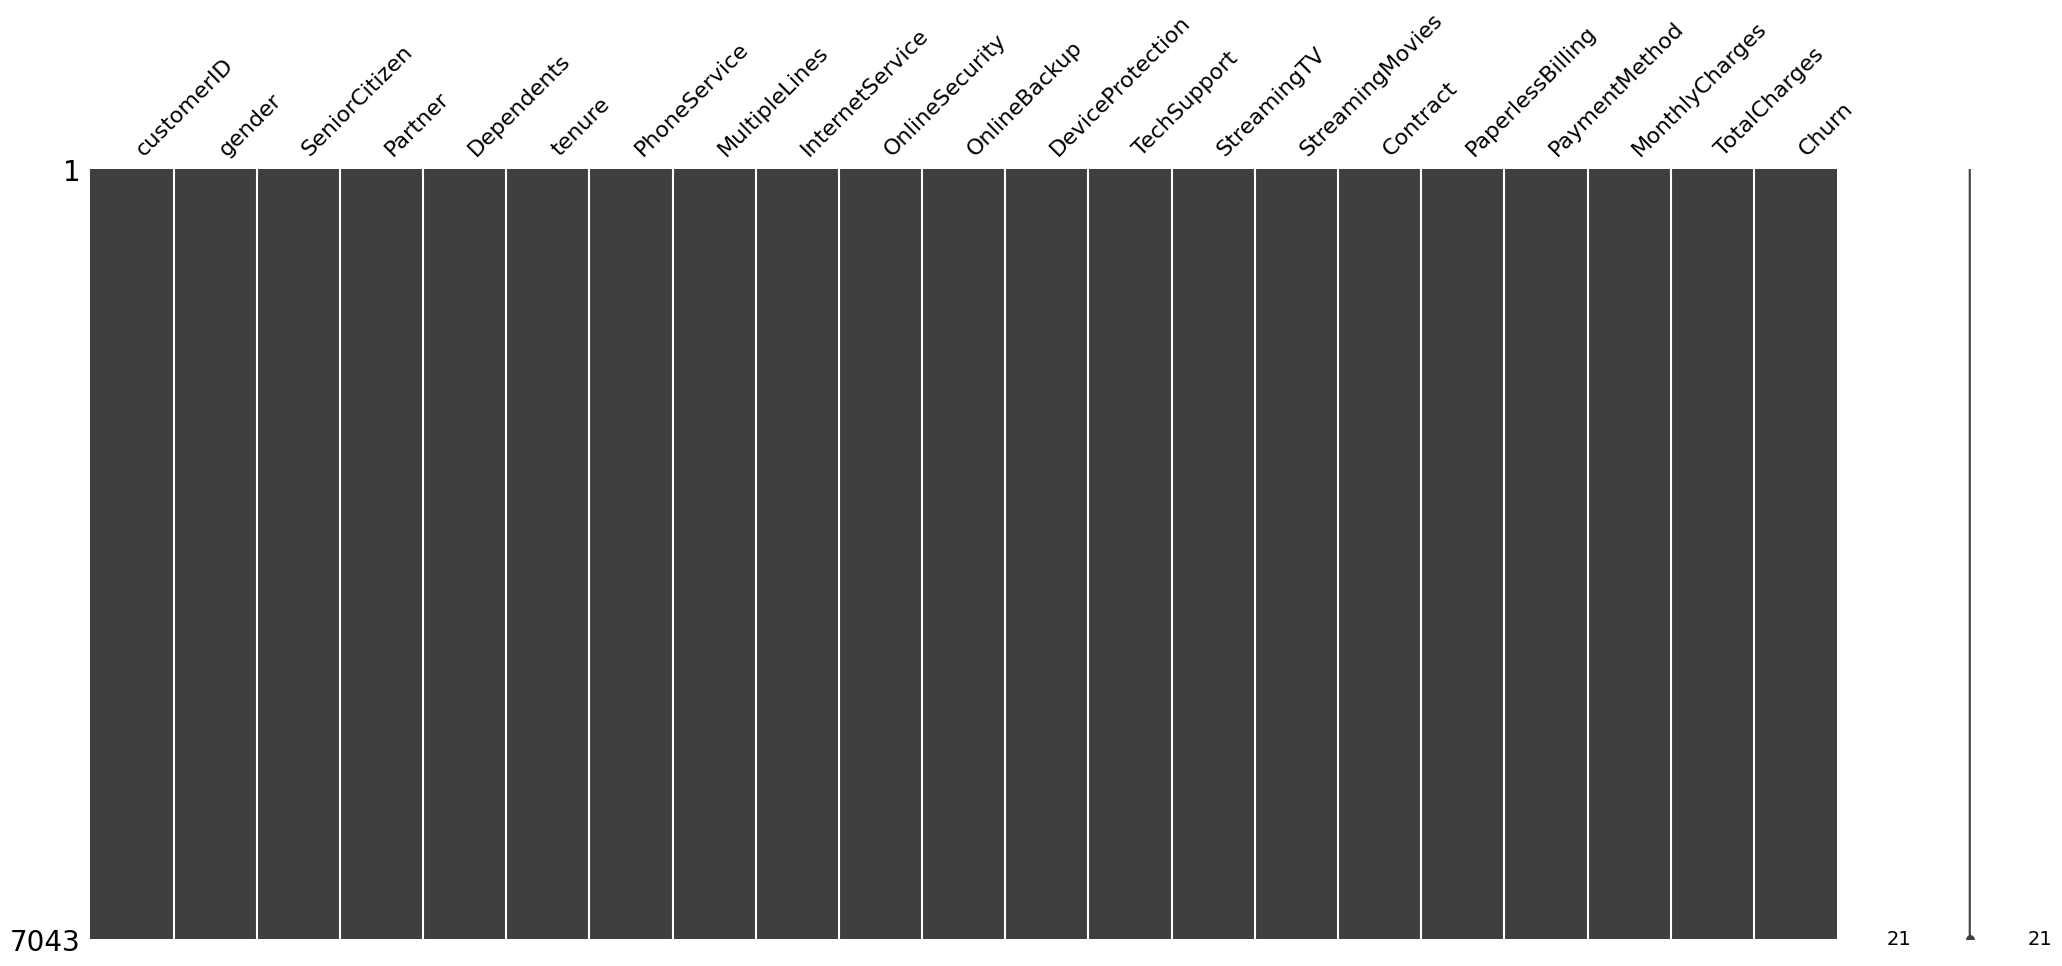

In [8]:
# 1. Revisión de los datos

# 1.1 Buscar datos faltantes
msno.matrix(Data)



Aparentemente, el dataset no presenta datos faltantes. Pero para poder asegurar lo anterior, debemos ser más exhaustivos en la busqueda de faltantes

In [9]:
# Convertir la columna 'TotalCharges' a numérica y manejar valores nulos
Data['TotalCharges'] = pd.to_numeric(Data.TotalCharges, errors='coerce')
# Verificar los valores nulos nuevamente después de la conversión
Data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nótese que en la columna "TotalCharges" se encuentran 11 valores nulos (NaN). Revisemos a los abonados con esos nulos

In [10]:
# Identificar las filas con valores nulos en 'TotalCharges'
null_total_charges = Data[Data['TotalCharges'].isnull()]

In [11]:
null_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Se puede observar que la columna "tenure" (tenencia) es 0 para estas entradas aunque la columna MonthlyCharges no esté vacía. Veamos si hay otros valores 0 en la columna de "Tenure".

In [12]:
Data[Data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Comentario: Las filas con valores nulos en 'TotalCharges' parecen estar asociadas con una tenencia de 0 meses.
Esto puede deberse a clientes nuevos que aún no han sido facturados.

#1.2 Decisiones sobre los faltantes



Pudimos demostrar que no faltan más valores en la columna "tenure"; por lo tanto, podemos eliminar esas 11 filas que no son representativas en el conjunto de datos. (Nótese que los índices corresponden a los mismos abonados) ya que se buscaron otros ceros en la columna "tenure" y coinciden con los datos faltantes en "TotalCharges"

In [13]:
# Eliminar las filas con tenencia de 0 meses y valores nulos en 'TotalCharges'
Data = Data.drop(Data[Data['tenure'] == 0].index)

In [14]:
Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
Data[Data['TotalCharges'] == ''].index

Int64Index([], dtype='int64')

Para resolver el problema de los valores faltantes en la columna "TotalCharges", decidí completarla con la media de los valores de esa columna.

In [16]:
# Rellenar los valores nulos en 'TotalCharges' con la media
Data['TotalCharges'].fillna(Data['TotalCharges'].mean(), inplace=True)

#1.3 Transformación de algunos datos



Vamos a proceder a transformar algunos datos del dataset, para facilitar la comprensión de los mismos

In [17]:
# Transformar la variable 'SeniorCitizen' de numérica a categórica
Data['SeniorCitizen'] = Data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
# Comentario: Esta transformación convierte la variable 'SeniorCitizen' en una variable categórica más interpretable.
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Aquí se procedió a transformar los valores de la columna "SeniorCitizen" que originalmente contienía valores numéricos, donde 0 representa "No" y 1 representa "Yes". La instrucción realiza una transformación de estos valores numéricos en valores de cadena (strings) "No" y "Yes" usando un mapeo

In [18]:
# Mostrar estadísticas descriptivas para la columna 'InternetService'
internet_desc = Data["InternetService"].describe(include=['object', 'bool'])
print("Descripción de la columna 'InternetService':")
print(internet_desc)

Descripción de la columna 'InternetService':
count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


La función "describe()" la utilizamos para extraer datos relevantes de la columna "InternetService"; al agregar el parámetro "include" para que la función "describe()" incluya estadisticas descriptivas

In [19]:
# Contar los valores únicos en la columna 'InternetService'
internet_value_counts = Data["InternetService"].value_counts()
print("\nConteo de valores únicos en la columna 'InternetService':")
print(internet_value_counts)


Conteo de valores únicos en la columna 'InternetService':
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


In [20]:
# Contar la combinación de valores de 'InternetService' y 'Contract'
internet_contract_value_counts = Data[["InternetService", "Contract"]].value_counts()
print("\nConteo de combinaciones de 'InternetService' y 'Contract':")
print(internet_contract_value_counts)


Conteo de combinaciones de 'InternetService' y 'Contract':
InternetService  Contract      
Fiber optic      Month-to-month    2128
DSL              Month-to-month    1223
No               Two year           633
DSL              Two year           623
                 One year           570
Fiber optic      One year           539
No               Month-to-month     524
Fiber optic      Two year           429
No               One year           363
dtype: int64


Nótese que los usuarios prefieren tener un contrato "Month-to-month" tanto para Fibra óptica y DSL

In [21]:
# Seleccionar columnas numéricas para mostrar estadísticas descriptivas
columnas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Mostrar estadísticas descriptivas para columnas numéricas seleccionadas
numeric_desc = Data[columnas_numericas].describe()
print("\nEstadísticas descriptivas para columnas numéricas:")
print(numeric_desc)


Estadísticas descriptivas para columnas numéricas:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000



Estas son las estadísticas descriptivas para las columnas numéricas seleccionadas:

tenure (Tenencia):

count: Hay 7032 valores no nulos en esta columna.

mean (Media): La media de la tenencia de los clientes es aproximadamente 32.42 meses.

std (Desviación estándar): La desviación estándar de la tenencia es aproximadamente 24.55 meses, lo que indica la dispersión de los datos.

min (Mínimo): El valor mínimo de tenencia es de 1 mes.

25% (Cuartil 1): El 25% de los clientes tienen una tenencia igual o menor a 9 meses.

50% (Mediana): La mediana de la tenencia es de aproximadamente 29 meses, lo que significa que el 50% de los clientes tienen una tenencia igual o menor a este valor.

75% (Cuartil 3): El 75% de los clientes tienen una tenencia igual o menor a 55 meses.

max (Máximo): El valor máximo de tenencia es de 72 meses.

MonthlyCharges (Cargos Mensuales):

Las estadísticas descriptivas para esta columna son similares a las de la columna 'tenure', pero se refieren a los cargos mensuales en lugar de la tenencia.

TotalCharges (Cargos Totales):

Las estadísticas descriptivas para esta columna son similares a las de las columnas anteriores, pero se refieren a los cargos totales acumulados en lugar de la tenencia o los cargos mensuales.

Estas estadísticas proporcionan una visión general de la distribución y la variabilidad de los datos en estas columnas numéricas, lo que puede ser útil para comprender mejor el comportamiento de los clientes y tomar decisiones informadas basadas en estos datos.


#1.4 Revisión por Género y por pérdida de clientes



In [22]:
etiqueta_genero = ['Male', 'Female']
etiqueta_churn = ['No', 'Yes']

# Crear subplots: use el tipo 'domain' para la subplot Pie
figura1 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
figura1.add_trace(go.Pie(labels=etiqueta_genero, values=Data['gender'].value_counts(), name="Gender"),
              1, 1)
figura1.add_trace(go.Pie(labels=etiqueta_churn, values=Data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Utilice 'hole' para crear un gráfico circular tipo donut

figura1.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

figura1.update_layout(
    title_text="Género y Distribución de abandonos",
    # Agregar anotaciones en el centro de la donut.
    annotations=[dict(text='Género', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Abandonos', x=0.82, y=0.5, font_size=20, showarrow=False)])
figura1.show()



*   El 26.6 % de los clientes se cambian a otro servicio
*   Entre los clientes el 49.5 % son Mujeres y el 50.5 % son Hombres

A continuación, queremos ver de esos porcentajes de abandono cuantos son Hombres y cuantos Mujeres



In [23]:
Data["Churn"][Data["Churn"]=="No"].groupby(by=Data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [24]:
Data["Churn"][Data["Churn"]=="Yes"].groupby(by=Data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

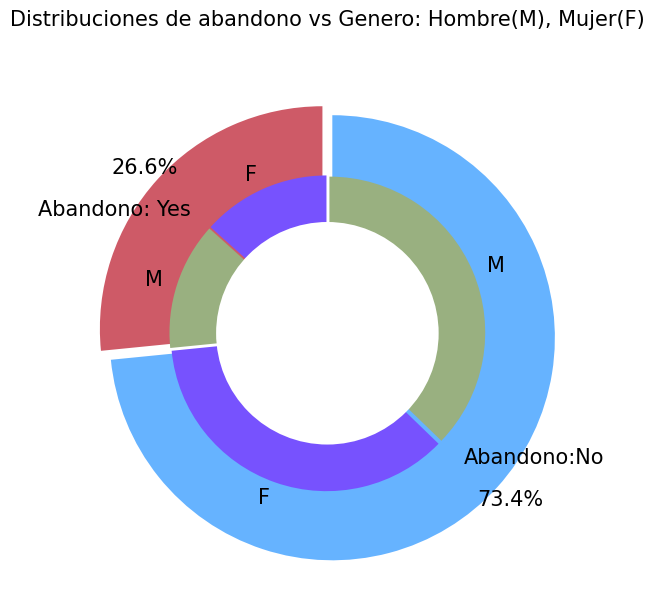

In [25]:
plt.figure(figsize=(6, 6))
labels =["Abandono: Yes","Abandono:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ce5a67', '#66b3ff']
colors_gender = ['#7752fe','#99b080', '#7752fe','#99b080']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuciones de abandono vs Genero: Hombre(M), Mujer(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Existe una diferencia insignificante en el porcentaje/recuento de clientes que cambiaron de proveedor de servicios por género. Ambos géneros se comportaron de manera similar cuando se trata de migrar a otro proveedor de servicios.

#1.5 Distribución de Clientes por tipo de Contrato

In [26]:
fig = px.histogram(Data, x="Churn", color="Contract", barmode="group", title="<b>Distribución de clientes por tipo de contrato<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Alrededor del 75 % de los clientes con contrato de mes a mes optaron por abandonar el servicio en comparación con el 13% de los clientes con contrato de un año y el 3% con contrato de dos años.

#1.6 Distribución de clientes por métodos de pago

In [27]:
labels = Data['PaymentMethod'].unique()
values = Data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Distribución de Métodos de Pago</b>")
fig.show()

In [28]:
fig = px.histogram(Data, x="Churn", color="PaymentMethod", title="<b>Distribución del Método de pago del Cliente vs Abandono</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*  Los principales clientes que se mudaron tenían cheque electrónico como método de pago.
*   Los clientes que optaron por la transferencia automática con tarjeta de crédito o la transferencia automática bancaria y el cheque enviado por correo como método de pago tenían menos probabilidades de mudarse.




#1.7 Abandonos por género y tipo de Servicio

In [29]:
Data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
Data[Data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [31]:
Data[Data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [32]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Distribuciòn de Abandonos vs Servicio de Internet y Género</b>")

fig.show()




*   Una gran cantidad de clientes eligen el servicio de Fibra óptica y también es evidente que los clientes que utilizan Fibra óptica tienen una alta tasa de abandono, esto podría sugerir una insatisfacción con este tipo de servicio de Internet.

*   Los clientes que tienen servicio DSL son mayoritarios y tienen una menor tasa de abandono en comparación con el servicio de fibra óptica.





#1.8 Abandono del servicio por distribución social del cliente

In [33]:
Data = Data.rename(columns={'Dependents': 'Dependientes', 'Churn': 'Abandono'})
color_map = {"Yes": "#C5E898", "No": "#0766AD"}
fig = px.histogram(Data, x="Abandono", color="Dependientes", barmode="group", title="<b>Distribución por dependientes</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes sin dependientes, tienen más probabilidades de abandonar el servicio

In [34]:
color_map = {"Yes": '#2B3499', "No": '#00CC96'}
fig = px.histogram(Data, x="Abandono", color="Partner", barmode="group", title="<b>Distribución de abandono VS Socios</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes que no tienen socios tienen más probabilidades de abandonar el servicio. Existe una relación de dependencia entre la condición de organización del cliente (si tiene o no un dependiente o socio) y la probabilidad de abandonar o no el servicio adquirido

In [35]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(Data, x="Abandono", color="SeniorCitizen", title="<b>Distribución de abandono VS Personas Mayores</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nótese que la cantidad de personas mayores es un porcentaje bajo, pero de ese porcentaje la mayoría de clientes mayores abandona el servicio

#1.9 Abandono por condiciones del servicio y tipo de método de pago

In [36]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(Data, x="Abandono", color="OnlineSecurity", barmode="group", title="<b>Abandono VS Seguridad Online</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

La mayoria de los clientes abandonan el servicio debido a la falta de seguridad en linea

In [37]:
color_map = {"Yes": '#FFA15A', "No": '#186F65'}
fig = px.histogram(Data, x="Abandono", color="PaperlessBilling",  title="<b>Distribución de abandono VS Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes con facturación electrónica tienen más probabilidades de abandonar el servicio

In [38]:
fig = px.histogram(Data, x="Abandono", color="TechSupport",barmode="group",  title="<b>Distribución de abandono VS Soporte técnico</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes sin soporte técnico tienen más probabilidades de migrar a otros proveedores de servicio

In [39]:
color_map = {"Yes": '#419197', "No": '#78D6C6'}
fig = px.histogram(Data, x="Abandono", color="PhoneService", title="<b>Distribución de abandono VS Servicio Telefónico</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Solamente una fracción pequeña de clientes no tiene servicio telefónico, y de esos 1/3 aproximadamente, tiene mas posibilidad de abandonar el servicio

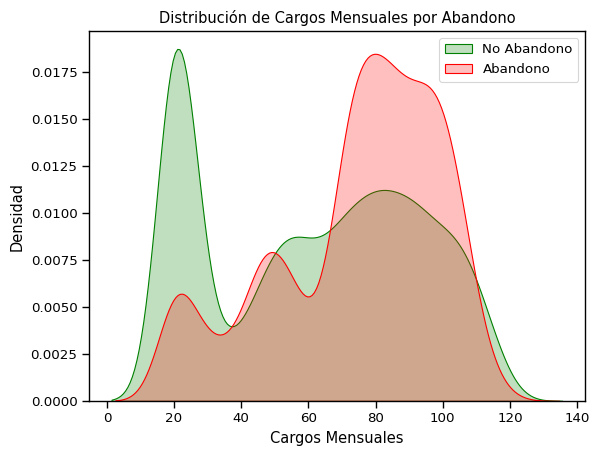

In [40]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Abandono"] == 'No') ],
                color="Green", fill = True);
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Abandono"] == 'Yes') ],
                ax =ax, color="Red", fill= True);
ax.legend(["No Abandono","Abandono"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Cargos Mensuales');
ax.set_title('Distribución de Cargos Mensuales por Abandono');

Los clientes con cargos mensuales más altos también tienen más probabilidades de abandonar

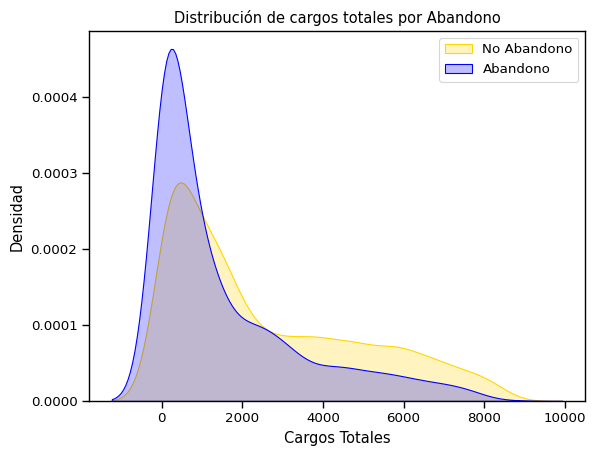

In [41]:
ax = sns.kdeplot(Data.TotalCharges[(Data["Abandono"] == 'No') ],
                color="Gold", fill = True);
ax = sns.kdeplot(Data.TotalCharges[(Data["Abandono"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["No Abandono","Abandono"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Cargos Totales');
ax.set_title('Distribución de cargos totales por Abandono');

In [42]:
fig = px.box(Data, x='Abandono', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenencia (Meses)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Abandono', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenencia vs Abandono</b>',
)

fig.show()

Es más probable que los nuevos clientes abandonen el servicio. Luego del més 30 hay una alta probabilidad de que el cliente no abandone el servicio

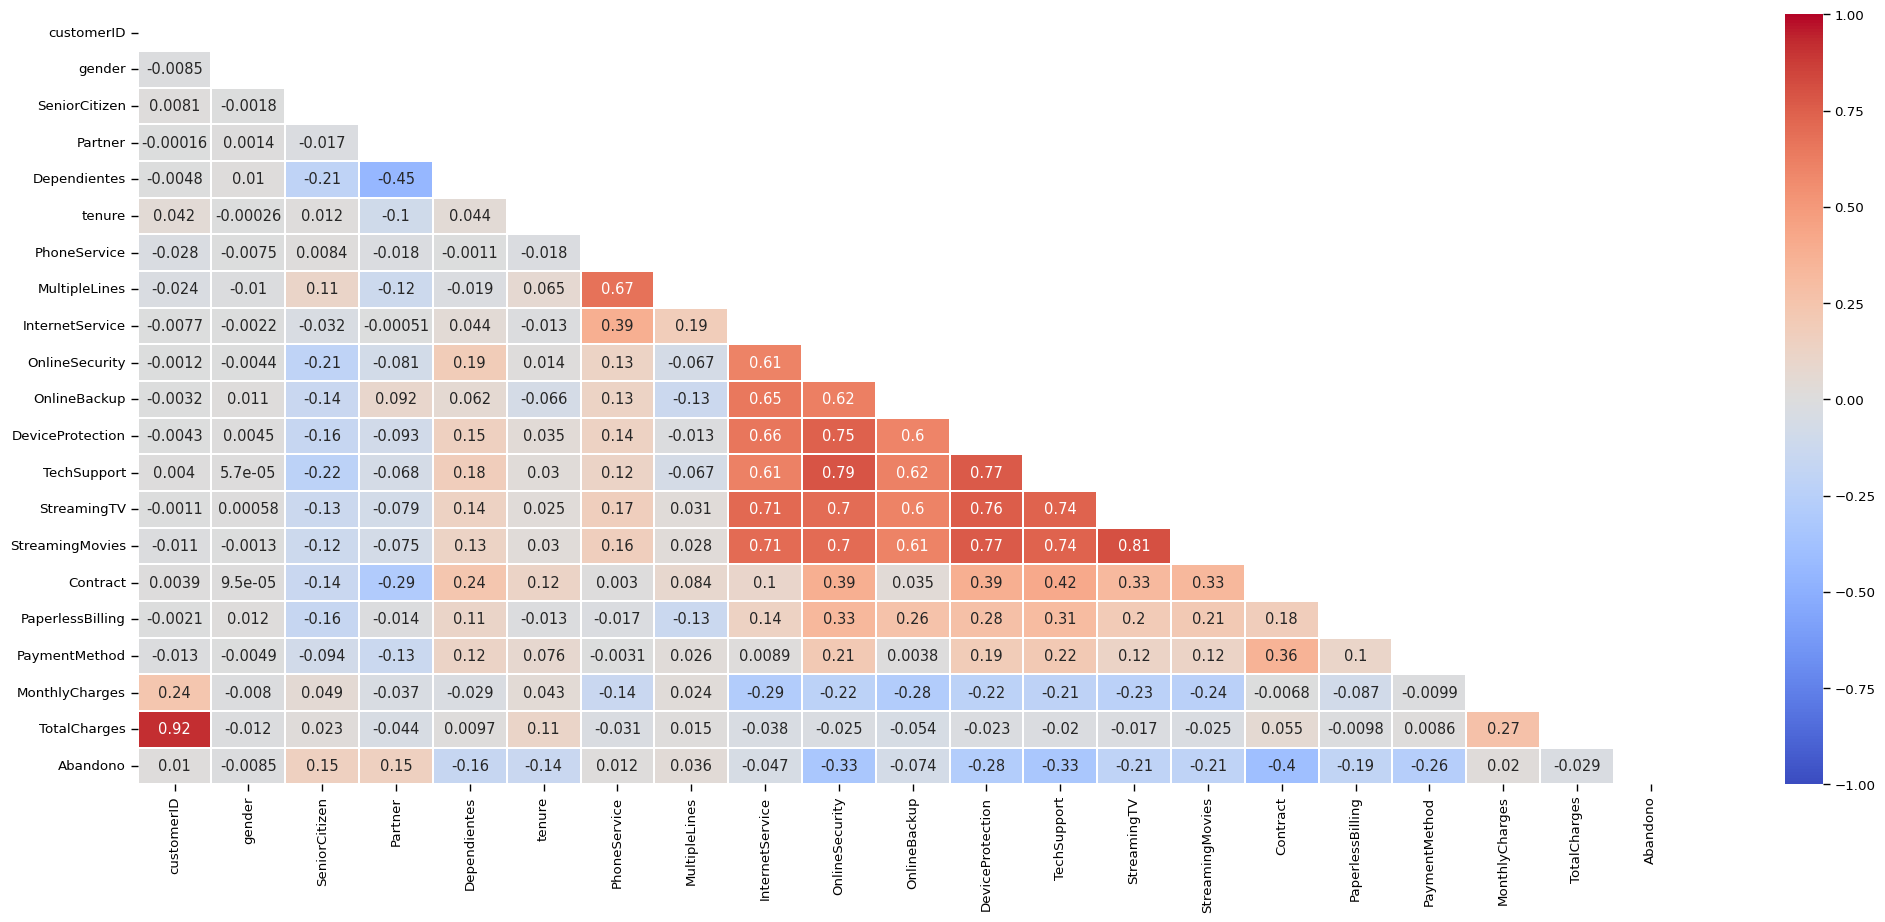

In [43]:
plt.figure(figsize=(25, 10))

corr = Data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<ipython-input-44-c254959ac8bb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




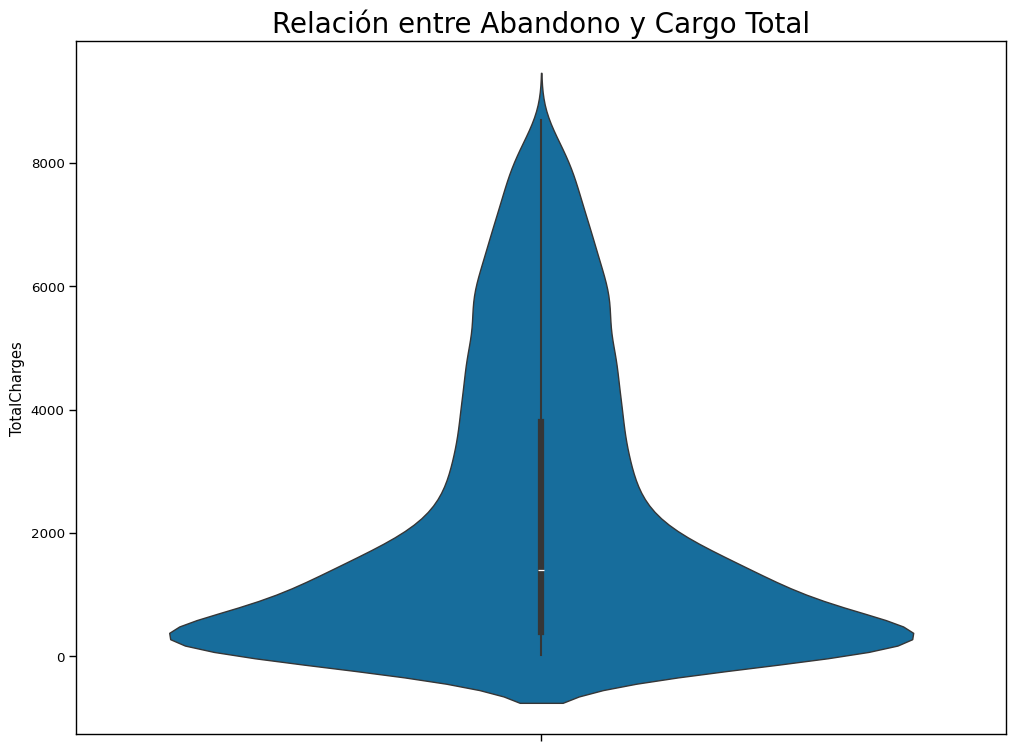

In [44]:
# TotalCharges vs Abandono
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(Data['TotalCharges'], palette = 'colorblind')
plt.title('Relación entre Abandono y Cargo Total', fontsize = 20, fontweight = 30)
plt.show()

El gráfico bivariado muestra que la mayor cantidad de abandono del servicio está en los usuarios que han realizado menos pagos totales, los clientes que pagan más de 3000 suelen tener menores tasas de abandono del servicio

#1.10 Fuentes alternativas de Datos



En la variable "url2" tenemos la fuente de datos de un Dataset mas completo relacionado con la pérdida de clientes. Hasta el momento, hemos venido analizando los datos encontrados en el dataset "Data"; en la fuente "url2" encontramos 3 datasets comprimidos en zip, para extraer los datos que nos interesan, utilizamos el segmento de código a continuación y lo almacenamos en la variable "Datos2".

In [45]:
from io import BytesIO
from zipfile import ZipFile
import requests

url2 = 'https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip'

target_file = 'telecom_customer_churn.csv' #Este código extrae de un archivo comprimido en la url, el archivo csv de interés.

response = requests.get(url2)

if response.status_code == 200:
  with ZipFile(BytesIO(response.content)) as zip_file:
    if target_file in zip_file.namelist():
      Data2 = pd.read_csv(zip_file.open(target_file))

      print(Data2)
    else:
        print(f"El archivo {target_file} no se encuentra en el ZIP.")

else:
        print(f"Error al descargar el archivo. Código de estado: {response.status_code}")



     Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0       

In [46]:
Data2.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [47]:
Data2=Data2[['Customer ID', 'Age', 'City', 'Latitude', 'Longitude']]

In [48]:
Data2.head()

,Customer ID,Age,City,Latitude,Longitude
0,0002-ORFBO,37,Frazier Park,34.827662,-118.999073
1,0003-MKNFE,46,Glendale,34.162515,-118.203869
2,0004-TLHLJ,50,Costa Mesa,33.645672,-117.922613
3,0011-IGKFF,78,Martinez,38.014457,-122.115432
4,0013-EXCHZ,75,Camarillo,34.227846,-119.079903


In [49]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependientes,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Abandono
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Revisamos el dataset "Data" y notamos que la variable "Customer ID" está escrito de forma diferente en en "Data2", para utilizar esa columna como primary key, debemos renombrar la columna.

In [50]:
Data.rename(columns={'customerID': 'Customer ID'}, inplace=True)

In [51]:
Data.head()


,Customer ID,gender,SeniorCitizen,Partner,Dependientes,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Abandono
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
Data3 = pd.merge(Data, Data2, on="Customer ID")

In [53]:
Data3.head()

,Customer ID,gender,SeniorCitizen,Partner,Dependientes,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Abandono,Age,City,Latitude,Longitude
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,Los Angeles,33.973616,-118.249020
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,46,Los Angeles,33.949255,-118.246978
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,Los Angeles,33.964131,-118.272783
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,Los Angeles,34.076259,-118.310715
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,Los Angeles,34.059281,-118.307420


A Data, vamos a agregar las columnas 'Customer ID', 'Age', 'City', 'Latitude', 'Longitude', esto con el fin de establecer la pérdida de clientes respecto a la ubicación geográfica. En el dataset Data no contabamos con esta información

#**2. Ingeniería de Atributos**

Este código define una función llamada object_to_int. La función toma una serie de pandas DataFrame como entrada y verifica si el tipo de datos de esa serie es 'object' (generalmente utilizado para columnas que contienen cadenas de texto). Si la serie es de tipo 'object', la función utiliza LabelEncoder de scikit-learn para transformar las cadenas de texto en números enteros

In [54]:
# Función para convertir columnas de tipo 'object' a tipo entero utilizando LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [55]:
# Aplicar la función object_to_int a todas las columnas del DataFrame Data3
Data3 = Data3.apply(lambda x: object_to_int(x))
Data3.head()

,Customer ID,gender,SeniorCitizen,Partner,Dependientes,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Abandono,Age,City,Latitude,Longitude
0,5365,0,0,1,0,1,0,1,0,0,...,0,1,2,29.85,29.85,0,36,554,33.973616,-118.249020
1,3953,1,0,0,0,34,1,0,0,2,...,1,0,3,56.95,1889.50,0,46,554,33.949255,-118.246978
2,2558,1,0,0,0,2,1,0,0,2,...,0,1,3,53.85,108.15,1,37,554,33.964131,-118.272783
3,5524,1,0,0,0,45,0,1,0,2,...,1,0,0,42.30,1840.75,0,53,554,34.076259,-118.310715
4,6500,0,0,0,0,2,1,0,1,0,...,0,1,2,70.70,151.65,1,19,554,34.059281,-118.307420


In [56]:
# Graficar la correlación entre las características y la variable objetivo 'Abandono'
plt.figure(figsize=(14,7))
Data3.corr()['Abandono'].sort_values(ascending = False)

Abandono            1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
Age                 0.115458
PaymentMethod       0.107852
MultipleLines       0.038043
City                0.037248
Longitude           0.024156
PhoneService        0.011691
gender             -0.008545
Customer ID        -0.017858
StreamingTV        -0.036303
StreamingMovies    -0.038802
Latitude           -0.041761
InternetService    -0.047097
Partner            -0.149982
Dependientes       -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Abandono, dtype: float64

<Figure size 1400x700 with 0 Axes>

X = Data3.drop(columns=['Abandono']): Crea un nuevo DataFrame X eliminando la columna 'Churn' del DataFrame original Data3. En otras palabras, X contendrá todas las columnas de Data3 excepto la columna 'Churn'. Esto se hace para preparar las características (variables independientes) que se utilizarán para entrenar un modelo.

y = Data3['Abandono'].values: Crea una serie y que contiene los valores de la columna 'Churn' del DataFrame original Data3. Esta serie representa la variable objetivo o etiquetas que se están tratando de predecir con el modelo. .values se utiliza para extraer los valores como un arreglo NumPy.

In [57]:
# Separar las características (X) de la variable objetivo (y)
X = Data3.drop(columns = ['Abandono'])
y = Data3['Abandono'].values

#2.1 Creación de los Datos de Entrenamiento y Datos de prueba



Utilizamos la función  train_test_split de scikit-learn para dividir los conjuntos de datos X e y en conjuntos de entrenamiento (X_train, y_train) y conjuntos de prueba (X_test, y_test)

In [58]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)


Este código define una función llamada distplot que utiliza la biblioteca seaborn y matplotlib para crear un gráfico de distribución (histograma y estimación de la función de densidad de kernel) de una característica específica del DataFrame

In [59]:
# Función para graficar la distribución de las características numéricas
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribución de {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)


<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

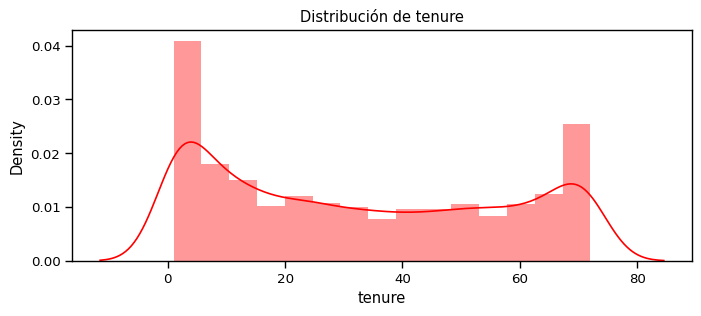

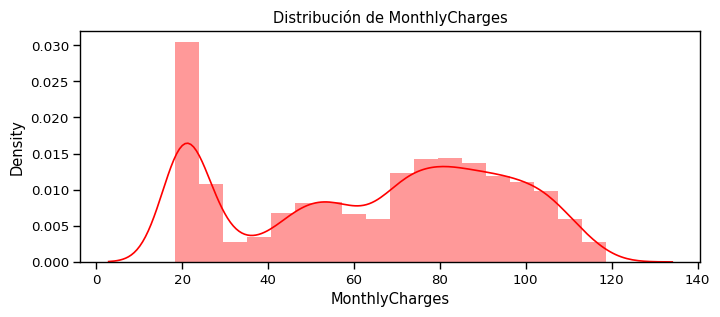

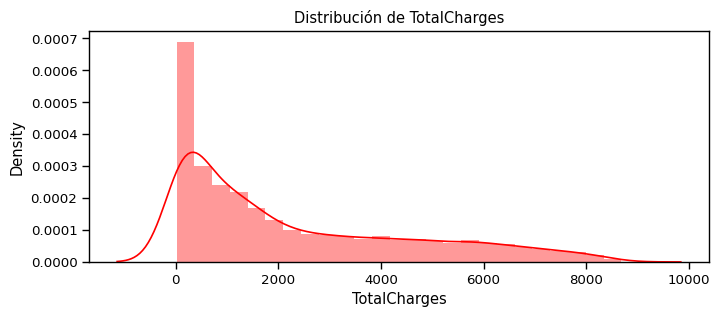

In [60]:
# Graficar la distribución de las características numéricas ('tenure', 'MonthlyCharges', 'TotalCharges')
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, Data3)

Dado que las características numéricas se distribuyen en diferentes rangos de valores, usaré el escalador estándar para reducirlas al mismo rango.

#2.2 Estandarizando atributos numéricos

<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-593b5df12529>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

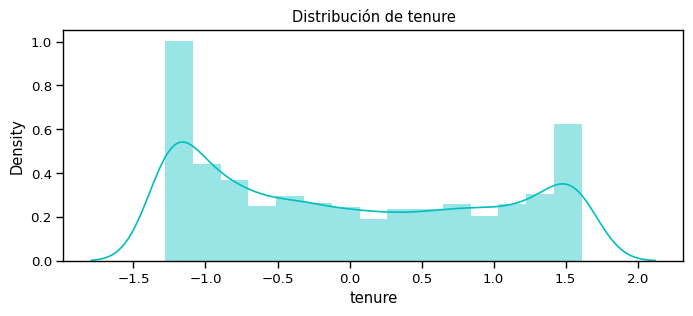

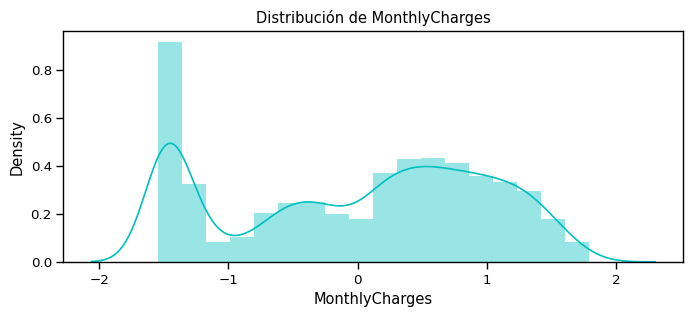

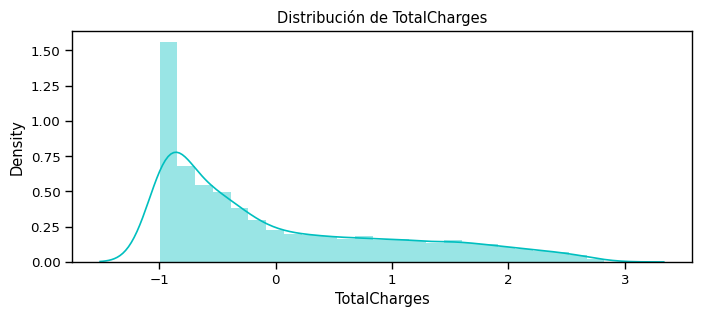

In [61]:
# Estandarizar las características numéricas utilizando StandardScaler()
Data3_std = pd.DataFrame(StandardScaler().fit_transform(Data3[num_cols].astype('float64')), columns=num_cols)

# Graficar la distribución de las características estandarizadas
for feat in num_cols:
    distplot(feat, Data3_std, color='c')

Estandarización de características: Se utiliza StandardScaler() para estandarizar las características numéricas del DataFrame Data3. La estandarización es un paso común en el preprocesamiento de datos para asegurar que todas las características tengan la misma escala y tengan una media de 0 y una desviación estándar de 1.

Creación del DataFrame estandarizado: Los datos estandarizados se almacenan en un nuevo DataFrame llamado Data3_std.

Divida las columnas en 3 categorías, una de estandarización, otra para label encoding y otra para hot encoding

In [62]:
# Columnas que necesitan codificación one-hot
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

# Columnas que necesitan codificación de etiquetas
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))


In [63]:
# Instanciar un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las características numéricas en el conjunto de entrenamiento
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Estandarizar las características numéricas en el conjunto de prueba utilizando el mismo scaler del conjunto de entrenamiento
X_test[num_cols] = scaler.transform(X_test[num_cols])

Este proceso asegura que las características numéricas en ambos conjuntos de datos estén en la misma escala, lo cual es importante para muchos algoritmos de aprendizaje automático. La normalización estándar ayuda a que las características tengan una media de cero y una desviación estándar de uno.

- Selección de columnas para codificación: Se definen dos listas: cat_cols_ohe para las columnas que necesitan codificación one-hot y cat_cols_le para las columnas que necesitan codificación de etiquetas. La lista cat_cols_le se crea restando las columnas numéricas (num_cols) y las columnas one-hot (cat_cols_ohe) del conjunto total de columnas en el conjunto de entrenamiento (X_train).

- Instanciación de StandardScaler: Se crea una instancia del objeto StandardScaler(), que se utilizará para estandarizar las características numéricas.

- Estandarización de características numéricas: Se estandarizan las características numéricas en los conjuntos de entrenamiento (X_train) y prueba (X_test). Esto se logra utilizando el método fit_transform para el conjunto de entrenamiento y transform para el conjunto de prueba. La estandarización se aplica solo a las características numéricas (num_cols) utilizando el objeto scaler que se ha ajustado al conjunto de entrenamiento. Esto garantiza que la misma transformación se aplique a ambos conjuntos de datos.

#**3. Modelo de Machine Learning - Entrenamiento y Testeo**

#3.1 KNN


K-Nearest Neighbors (KNN) es un algoritmo simple y ampliamente utilizado para clasificación y regresión. Para nuestro análisis utilizaremos clasificación


In [64]:
# Crear un modelo KNN con 11 vecinos
knn_model = KNeighborsClassifier(n_neighbors=11)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
predicted_y = knn_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_knn = knn_model.score(X_test, y_test)

# Imprimir la precisión del modelo KNN
print("KNN accuracy:", accuracy_knn)

KNN accuracy: 0.7161137440758294


In [65]:
# Imprimir el informe de clasificación KNN
print("\nInforme de Clasificación KNN:")
print(classification_report(y_test, predicted_y))


Informe de Clasificación KNN:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1549
           1       0.31      0.05      0.09       561

    accuracy                           0.72      2110
   macro avg       0.52      0.50      0.46      2110
weighted avg       0.62      0.72      0.63      2110



Precision (Precisión):

Para la clase 0 (clientes que no abandonaron el servicio), la precisión es del 74%. Esto significa que el 74% de las predicciones de clientes que no abandonaron el servicio fueron correctas.
Para la clase 1 (clientes que abandonaron el servicio), la precisión es del 31%. Esto significa que solo el 31% de las predicciones de clientes que abandonaron el servicio fueron correctas.

Recall (Recuperación o Sensibilidad):

Para la clase 0, el recall es del 96%. Esto significa que el 96% de los clientes que realmente no abandonaron el servicio fueron correctamente identificados por el modelo.
Para la clase 1, el recall es del 5%. Esto significa que solo el 5% de los clientes que realmente abandonaron el servicio fueron correctamente identificados por el modelo.

F1-score:

El F1-score combina precision y recall en una sola métrica. Es útil cuando hay un desequilibrio entre las clases. Para la clase 0, el F1-score es del 0.83, mientras que para la clase 1 es del 0.09.

Soporte (Support):

El soporte indica el número de ocurrencias de cada clase en el conjunto de prueba. Hay 1549 instancias de la clase 0 y 561 instancias de la clase 1.

Exactitud (Accuracy):

La exactitud del modelo es del 72%. Esto indica la proporción de predicciones correctas sobre el total de predicciones realizadas en el conjunto de prueba.

Macro average (Promedio macro) y Weighted average (Promedio ponderado):

El macro average calcula las métricas promedio sin considerar el desequilibrio de clases.
El weighted average calcula las métricas promedio considerando el desequilibrio de clases ponderando las métricas de cada clase por su soporte.

**Comentarios:**

El modelo tiene un buen desempeño en la predicción de la clase mayoritaria (no abandono del servicio), con alta precisión y recall.
Sin embargo, el modelo tiene un desempeño deficiente en la predicción de la clase minoritaria (abandono del servicio), con baja precisión, recall y F1-score.
La exactitud del modelo del 72% indica que, en general, el modelo clasifica correctamente el 72% de los casos en el conjunto de prueba.
Dado el desequilibrio en el soporte de las clases, el promedio macro y el promedio ponderado de las métricas son diferentes, lo que refleja la necesidad de considerar el desequilibrio de clases al evaluar el rendimiento del modelo.

#3.2 SVC



El modelo Support Vector Classification (SVC) es un clasificador de máquinas de vectores de soporte utilizado para problemas de clasificación

In [66]:
# Crear un clasificador de Máquinas de Soporte Vectorial (SVC) con el parámetro de aleatorización establecido en 1 para garantizar la reproducibilidad
svc_model = SVC(random_state=1)

# Entrenar el modelo SVC utilizando los datos de entrenamiento
svc_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado
predict_y = svc_model.predict(X_test)

# Evaluar la precisión del modelo SVM en el conjunto de prueba
accuracy_svc = svc_model.score(X_test, y_test)

# Imprimir la precisión del modelo SVM en la consola
print("SVM accuracy is:", accuracy_svc)

SVM accuracy is: 0.7341232227488151


In [67]:
# Imprimir un informe detallado de clasificación para el modelo SVC en el conjunto de prueba
print("\nInforme de Clasificación SVC:")
print(classification_report(y_test, predict_y, zero_division=1))


Informe de Clasificación SVC:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       1.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.87      0.50      0.42      2110
weighted avg       0.80      0.73      0.62      2110



El informe de clasificación proporciona una evaluación detallada del rendimiento del modelo SVC en el conjunto de prueba:

Precision: La precisión para la clase 0 (no abandono) es del 73%, lo que indica que el modelo clasifica correctamente el 73% de los casos predichos como no abandono que son verdaderos. Sin embargo, para la clase 1 (abandono), la precisión es del 100%, lo que sugiere que el modelo clasifica correctamente todos los casos predichos como abandono que son verdaderos.

Recall: El recall para la clase 0 es del 100%, lo que significa que el modelo identifica correctamente todos los casos de no abandono en el conjunto de prueba. Para la clase 1, el recall es del 0%, lo que indica que el modelo no identifica correctamente ningún caso de abandono en el conjunto de prueba.

F1-score: El puntaje F1 para la clase 0 es del 85%, que es una medida balanceada entre precisión y recall. Sin embargo, para la clase 1, el puntaje F1 es del 0%, lo que sugiere un rendimiento muy pobre del modelo en la predicción de abandono.

Accuracy: La precisión general del modelo en el conjunto de prueba es del 73%, lo que indica que el 73% de las predicciones del modelo son correctas.

Macro avg: El promedio macro de precision, recall y F1-score es del 87%, 50% y 42% respectivamente. Esto proporciona una medida agregada del rendimiento del modelo en todas las clases, tratando cada clase de manera uniforme.

Weighted avg: El promedio ponderado de precision, recall y F1-score es del 80%, 73% y 62% respectivamente. Esto tiene en cuenta el desequilibrio de clases en el conjunto de datos, dándole más peso a las clases con mayor soporte (número de instancias).

El modelo tiene un buen rendimiento en la predicción de casos de no abandono, pero tiene un rendimiento muy deficiente en la predicción de casos de abandono, lo que sugiere que el modelo necesita ser mejorado, posiblemente mediante ajuste de hiperparámetros o selección de características.







# 3.3 Random Forest



El modelo Random Forest es un algoritmo de aprendizaje automático que pertenece a la categoría de métodos de conjunto (ensemble methods). Un Random Forest construye múltiples árboles de decisión durante el entrenamiento y fusiona sus predicciones para obtener un resultado más robusto y generalizable.

In [68]:
# Crear un clasificador Random Forest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1, random_state =50, max_features = "sqrt", max_leaf_nodes = 30)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Hacer prediciones
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8132701421800947


In [69]:
# Mostrar otros indicadores de clasificación
print("\nInforme de Clasificación Random Forest:")
print(classification_report(y_test, prediction_test))


Informe de Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1549
           1       0.72      0.49      0.58       561

    accuracy                           0.81      2110
   macro avg       0.78      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Este es un informe de clasificación que evalúa el rendimiento de un modelo Random Forest en un conjunto de datos de prueba. Aquí hay una explicación de cada métrica en el informe:

**Precisión (Precision):**

- La precisión mide la proporción de instancias predichas como positivas que fueron clasificadas correctamente.

- Para la clase 0 (no abandono), la precisión es del 83%, lo que significa que el 83% de las instancias predichas como no abandono realmente pertenecen a la clase no abandono.

- Para la clase 1 (abandono), la precisión es del 72%, lo que indica que el 72% de las instancias predichas como abandono realmente pertenecen a la clase abandono.

**Recuperación (Recall):**

- La recuperación, también conocida como sensibilidad o tasa positiva real, mide la proporción de instancias positivas que fueron clasificadas correctamente.

- Para la clase 0, la recuperación es del 93%, lo que significa que el 93% de las instancias reales de la clase no abandono fueron identificadas correctamente por el modelo.

- Para la clase 1, la recuperación es del 49%, lo que indica que solo el 49% de las instancias reales de la clase abandono fueron identificadas correctamente por el modelo.

**Puntaje F1 (F1-Score):**

- El puntaje F1 es la media armónica de precisión y recuperación y proporciona una medida única del rendimiento del modelo.

- Para la clase 0, el puntaje F1 es del 88%, lo que indica un buen equilibrio entre precisión y recuperación para esta clase.

- Para la clase 1, el puntaje F1 es del 58%, lo que sugiere que hay margen de mejora en el equilibrio entre precisión y recuperación para esta clase.

**Soporte (Support):**

El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos de prueba.
Para la clase 0, hay 1549 instancias en el conjunto de datos de prueba.
Para la clase 1, hay 561 instancias en el conjunto de datos de prueba.

**Exactitud (Accuracy):**

- La exactitud es la proporción de instancias clasificadas correctamente (tanto positivas como negativas) en relación con el total de instancias.

- En este caso, la exactitud global del modelo es del 81%, lo que indica que el 81% de todas las instancias en el conjunto de datos de prueba fueron clasificadas correctamente por el modelo.

**Promedio Ponderado (Weighted Average) y Promedio Macro (Macro Average):**

- Estas métricas proporcionan un resumen general del rendimiento del modelo en todas las clases.

- El promedio ponderado tiene en cuenta la proporción de instancias en cada clase, mientras que el promedio macro no lo hace.

- En este informe, el promedio ponderado de precisión, recuperación y puntaje F1 es del 80%, lo que indica el rendimiento general del modelo considerando todas las clases.

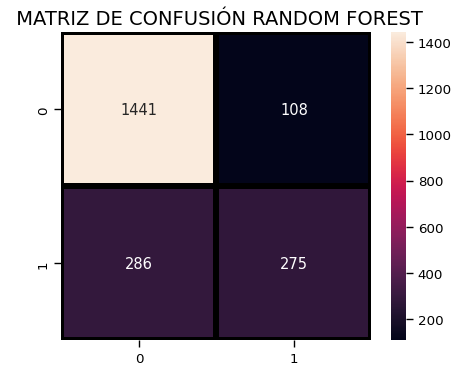

In [70]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" MATRIZ DE CONFUSIÓN RANDOM FOREST",fontsize=14)
plt.show()

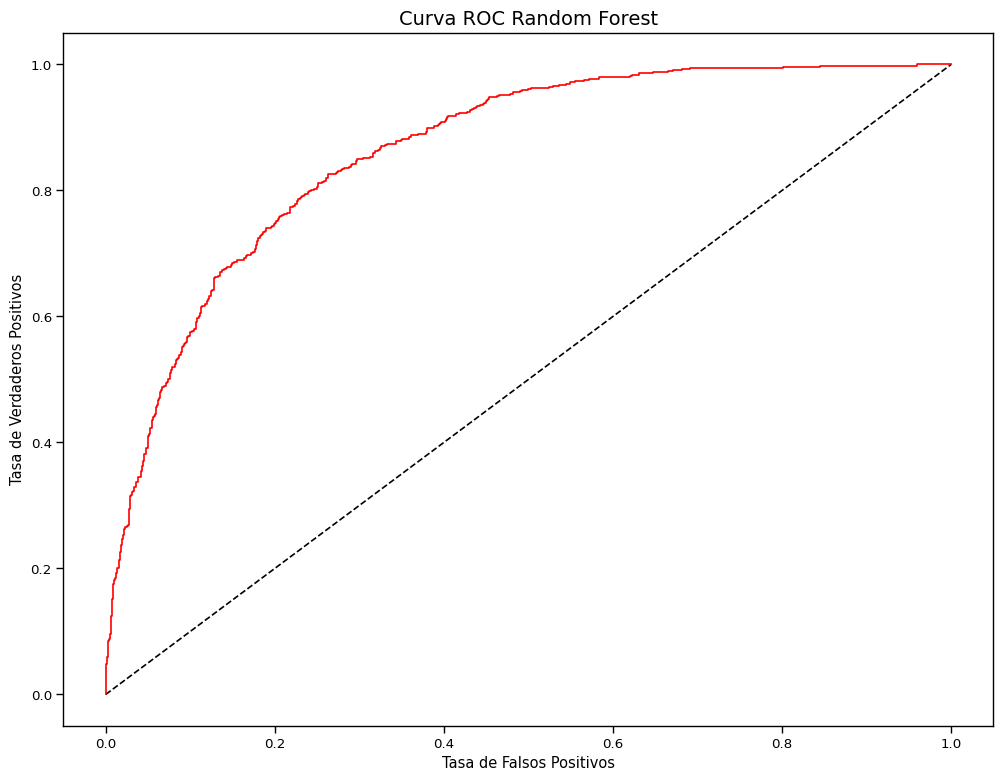

In [71]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Random Forest',fontsize=14)
plt.show();

#3.4 Regresión Logística



La regresión logística es un modelo estadístico que se utiliza para predecir la probabilidad de que una variable dependiente binaria (dicotómica) tenga un valor de 1 o 0 en función de una o más variables independientes. A diferencia de la regresión lineal, la regresión logística utiliza la función logística para transformar la combinación lineal de las variables independientes en un valor entre 0 y 1, que se interpreta como la probabilidad de pertenecer a la categoría positiva.

In [72]:
# Importar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística con un número máximo de iteraciones alto
lr_model = LogisticRegression(max_iter=10000)

# Entrenar el modelo de regresión logística con los datos de entrenamiento
lr_model.fit(X_train, y_train)

# Evaluar la precisión del modelo de regresión logística en los datos de prueba
accuracy_lr = lr_model.score(X_test, y_test)

# Imprimir la precisión del modelo de regresión logística
print("La precisión de la regresión logística es:", accuracy_lr)

La precisión de la regresión logística es: 0.8099526066350711


In [73]:
# Hacer predicciones utilizando el modelo de regresión logística en los datos de prueba
lr_pred = lr_model.predict(X_test)

# Generar un informe de clasificación que incluya precision, recall, f1-score y soporte para cada clase
report = classification_report(y_test, lr_pred)

# Imprimir el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



Este resultado corresponde al informe de clasificación generado por el modelo de regresión logística.

**Precision (Precisión):** Es la proporción de verdaderos positivos sobre todos los positivos predichos por el modelo. Para la clase 0, la precisión es del 85%, lo que significa que el 85% de las predicciones de la clase 0 son correctas. Para la clase 1, la precisión es del 67%, lo que significa que el 67% de las predicciones de la clase 1 son correctas.

**Recall (Recuperación o Sensibilidad):** Es la proporción de verdaderos positivos sobre todos los positivos reales en los datos. Para la clase 0, el recall es del 90%, lo que significa que el 90% de todos los casos reales de la clase 0 fueron identificados correctamente por el modelo. Para la clase 1, el recall es del 55%, lo que significa que solo el 55% de todos los casos reales de la clase 1 fueron identificados correctamente por el modelo.

**F1-score (Puntuación F1):** Es una medida de la precisión del modelo que combina precision y recall en un solo número. Es útil cuando hay un desequilibrio entre las clases. El F1-score es del 87% para la clase 0 y del 61% para la clase 1.

**Support (Soporte):** Es el número de ocurrencias reales de cada clase en los datos de prueba.

**Accuracy (Precisión Global):** Es la proporción de muestras correctamente clasificadas sobre todas las muestras. En este caso, la precisión global del modelo es del 81%, lo que significa que el 81% de todas las muestras fueron clasificadas correctamente por el modelo.

**Macro Average (Promedio Macro):** Es el promedio de las métricas (precision, recall, F1-score) calculadas para cada clase por separado. En este caso, el promedio macro de precision, recall y F1-score es del 76%, 73% y 74% respectivamente.

**Weighted Average (Promedio Ponderado):** Es similar al promedio macro, pero se pondera según el soporte de cada clase. En este caso, el promedio ponderado de precision, recall y F1-score es del 80%.

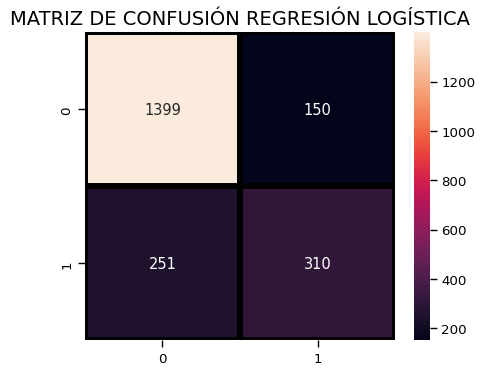

In [74]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("MATRIZ DE CONFUSIÓN REGRESIÓN LOGÍSTICA",fontsize=14)
plt.show()

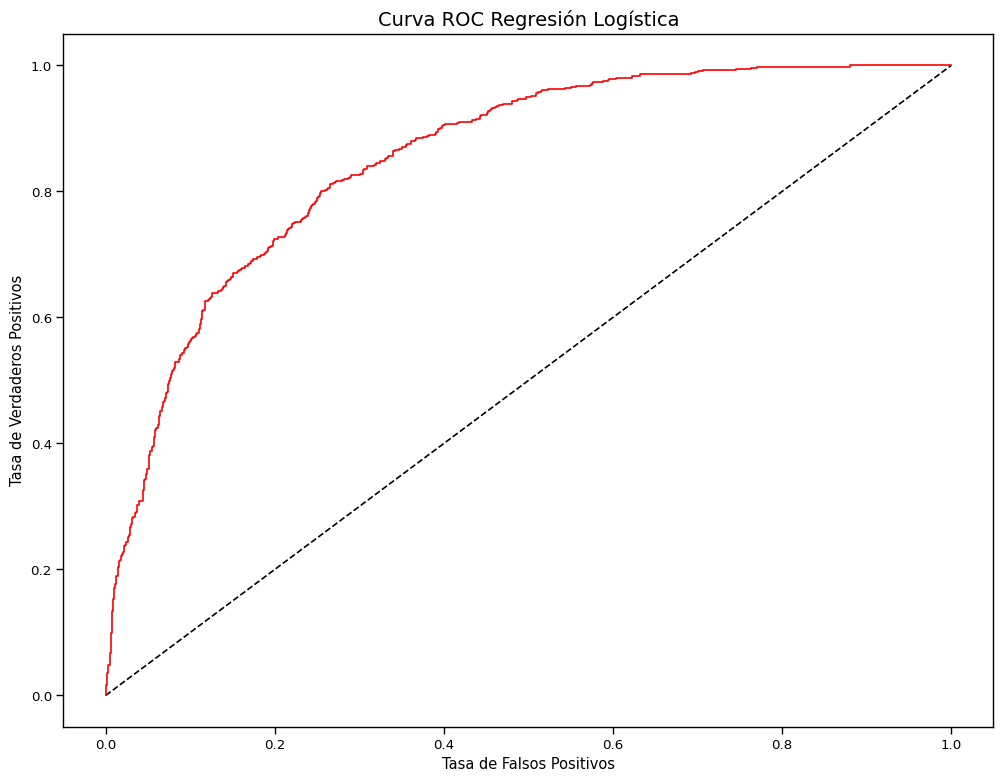

In [75]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Regresión Logística',color = "r")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Regresión Logística',fontsize=14)
plt.show();

# 3.5 Clasificador de Arbol de Decisión



Un clasificador de árbol de decisión es un modelo de aprendizaje supervisado que se utiliza para predecir la etiqueta de clase de una instancia basándose en las características de esa instancia. Este modelo toma decisiones en forma de un árbol, donde cada nodo interno representa una prueba en una característica, cada rama representa el resultado de la prueba, y cada hoja del árbol representa una etiqueta de clase.

In [76]:
# Crear un modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
predictdt_y = dt_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy_dt = dt_model.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del Árbol de Decisión:", accuracy_dt)

Precisión del Árbol de Decisión: 0.747867298578199


La performance de este clasificador genera un score bastante bajo

In [77]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1549
           1       0.52      0.55      0.54       561

    accuracy                           0.75      2110
   macro avg       0.68      0.69      0.68      2110
weighted avg       0.75      0.75      0.75      2110



El resultado es un informe de clasificación que evalúa el rendimiento de un modelo de arbol de decisión en un conjunto de datos de prueba.

- **Precision (Precisión)**: La precisión se refiere a la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo. Para la clase 0, la precisión es del 83%, lo que indica que el 83% de las predicciones de la clase 0 son correctas. Para la clase 1, la precisión es del 52%, lo que indica que el 52% de las predicciones de la clase 1 son correctas.

- **Recall (Recuperación)**: La recuperación se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Para la clase 0, la recuperación es del 82%, lo que indica que el 82% de todas las instancias verdaderamente positivas de la clase 0 fueron identificadas correctamente por el modelo. Para la clase 1, la recuperación es del 53%, lo que indica que el 53% de todas las instancias verdaderamente positivas de la clase 1 fueron identificadas correctamente por el modelo.

- **F1-score**: El puntaje F1 es una media armónica de precisión y recuperación. Es útil cuando hay un desequilibrio entre las clases en los datos. El puntaje F1 busca un equilibrio entre precisión y recuperación. Para la clase 0, el puntaje F1 es del 83%, y para la clase 1, el puntaje F1 es del 52%.

- **Support (Soporte)**: Es el número real de ocurrencias de la clase en los datos de prueba.

- **Accuracy (Precisión Global)**: La precisión global mide la proporción de predicciones correctas (tanto positivas como negativas) realizadas por el modelo. En este caso, la precisión global es del 75%, lo que indica que el 75% de todas las predicciones realizadas por el modelo son correctas.

- **Macro Avg y Weighted Avg**: Son promedios de las métricas (precisión, recuperación, puntaje F1) calculadas para cada clase. En este caso, el promedio macro y el promedio ponderado de las métricas son aproximadamente iguales, lo que indica que no hay un gran desequilibrio entre las clases en los datos de prueba.

Este informe de clasificación proporciona una evaluación detallada del rendimiento del modelo de clasificación en ambos casos positivos y negativos.

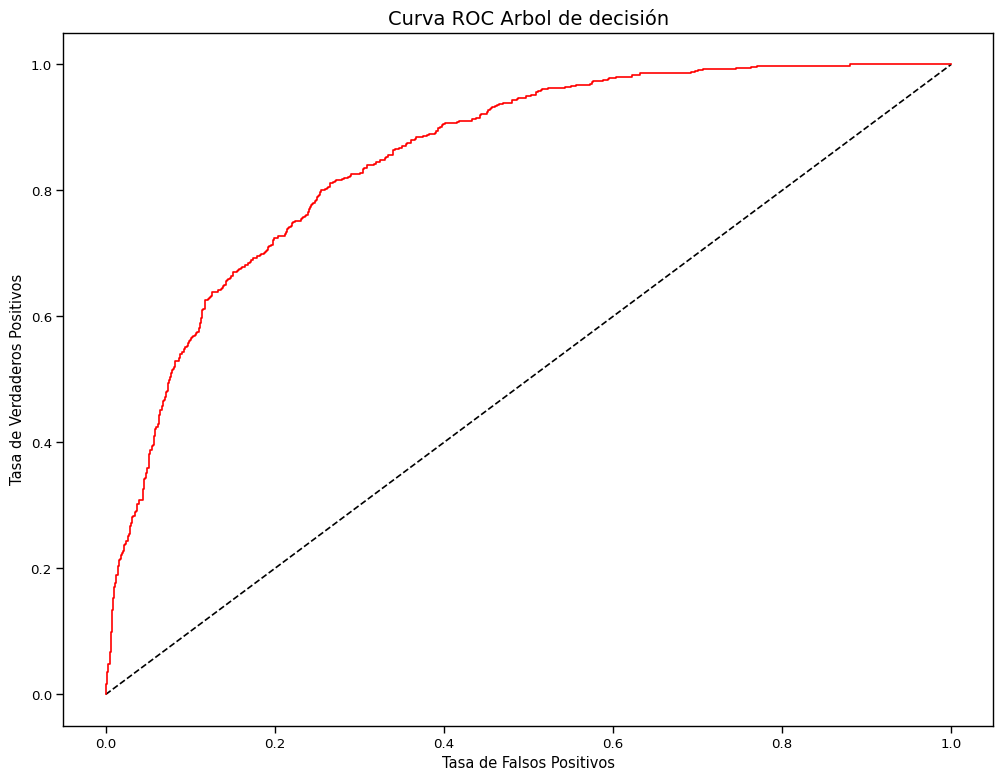

In [78]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Arbol de Decisión',color = "r")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Arbol de decisión',fontsize=14)
plt.show();

In [79]:
# Obtener probabilidades de predicción en lugar de etiquetas de clase para el modelo de árbol de decisión
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Obtener probabilidades de predicción en lugar de etiquetas de clase para el modelo de regresión logística
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Obtener probabilidades de predicción en lugar de etiquetas de clase para el modelo de bosque aleatorio
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]


In [80]:
from sklearn.metrics import roc_curve, auc
# Calcular la curva ROC para cada modelo
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rfpred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

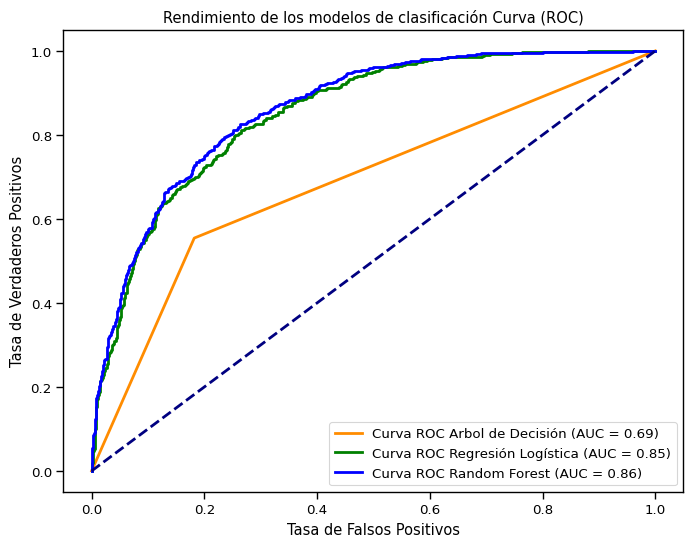

In [81]:
# Graficar las curvas ROC superpuestas
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Curva ROC Arbol de Decisión (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Curva ROC Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Curva ROC Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Rendimiento de los modelos de clasificación Curva (ROC)')
plt.legend(loc='lower right')
plt.show()

En el gráfico anterior se puede observar mejor el desempeño de los modelos de clasificación utilizados. El AUC del Random Forest es el mejor clasificador, según la siguiente imagen:

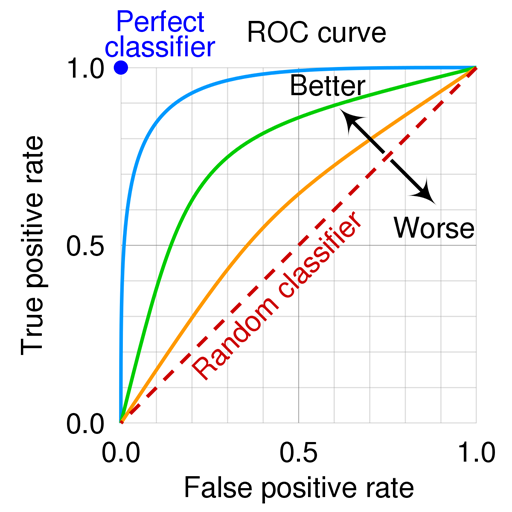

# 3.6 Selección de Variables

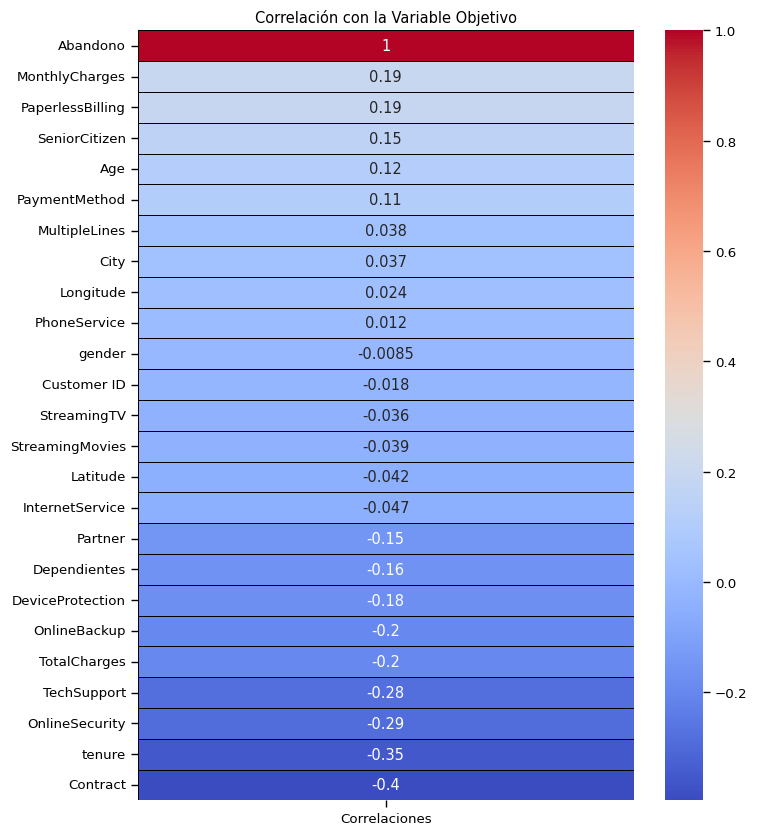

In [82]:
# Calcular las correlaciones de las características con la variable objetivo 'Abandono'
corr = Data3.corrwith(Data3['Abandono']).sort_values(ascending=False).to_frame()

# Renombrar la columna para mayor claridad
corr.columns = ['Correlaciones']

# Crear un gráfico de mapa de calor para visualizar las correlaciones
plt.subplots(figsize=(8, 10))  # Establecer el tamaño de la figura
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')

# Agregar título al gráfico
plt.title('Correlación con la Variable Objetivo')

# Mostrar el gráfico
plt.show()


MultipleLines, PhoneService, gender, StreamingTV, StreamingMovies e InternetService no presentan ningún tipo de correlación. Se eliminan las características con coeficiente de correlación entre (-0.1,0.1).
Las características restantes muestran una correlación positiva o negativa significativa.

3.6.1 Funciones categóricas

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

**Prueba de Chi Cuadrado**

In [84]:
col = list(Data3.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(Data3[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependientes PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Abandono
Numerical Features : Customer ID tenure MonthlyCharges TotalCharges Age City Latitude Longitude


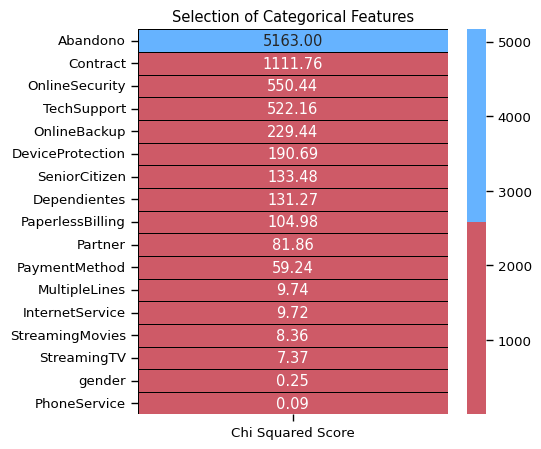

In [85]:
features = Data3.loc[:,categorical_features]
target = Data3.loc[:,'Abandono']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines e InternetService muestran una relación muy baja con respecto al Abandono

3.6.2 Funciones numéricas

In [86]:
from sklearn.feature_selection import f_classif

**Prueba ANOVA**

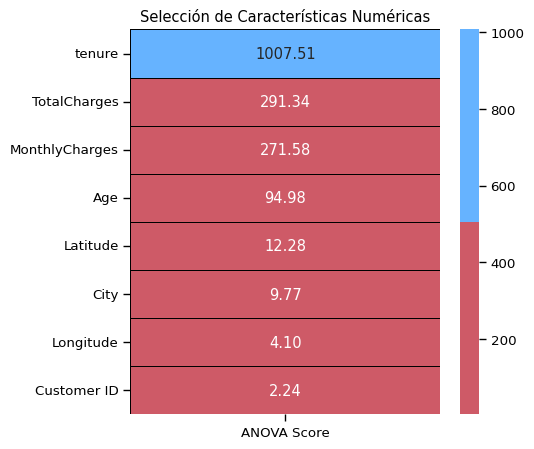

In [87]:
features = Data3.loc[:,numerical_features]
target = Data3.loc[:,'Abandono']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selección de Características Numéricas');

Según la prueba ANOVA, cuanto mayor sea el valor de la puntuación ANOVA, mayor será la importancia de la característica.

De los resultados anteriores, se recomienda incluir las tres características con mayor puntuación. Se seleccionarán las 3 primeras de la puntuación

In [88]:
Data3.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService', 'Age', 'City', 'Latitude', 'Longitude','Customer ID'],inplace = True)
Data3.head()

,SeniorCitizen,Partner,Dependientes,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Abandono
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


3.6.3 Equilibrio de Datos usando SMOTE:

Para hacer frente a datos desequilibrados, existen 2 opciones:

Submuestreo: recorta las muestras mayoritarias de la variable objetivo.
Sobremuestreo: aumenta las muestras minoritarias de la variable objetivo a muestras mayoritarias.

Después de hacer prueba-error con submuestreo y sobremuestreo, Se ha decidido utilizar el sobremuestreo.

Para el equilibrio de datos, usaremos imblearn.
Declaración de pip: pip install imbalanced-learn

In [89]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [90]:
over = SMOTE(sampling_strategy = 1)

f1 = Data3.iloc[:,:13].values
t1 = Data3.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5163, 1: 5163})

Se eliminaron 11 columnas: 5 numéricas y 6 categóricas

#3.7 Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [92]:
# KNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X, y, cv=5)  # 5-fold cross-validation
print("KNN Cross-Validation Scores:", knn_scores)
print("Mean Accuracy:", np.mean(knn_scores))

KNN Cross-Validation Scores: [0.70433547 0.69651741 0.69985775 0.71479374 0.71337127]
Mean Accuracy: 0.7057751276133051


In [93]:
from sklearn.model_selection import cross_val_predict
knn_model = KNeighborsClassifier()
# Realizar predicciones utilizando validación cruzada
predicted_y = cross_val_predict(knn_model, X, y, cv=5)

# Generar informe de clasificación
report = classification_report(y, predicted_y)
print("Informe de Clasificación KNN:")
print(report)

Informe de Clasificación KNN:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      5163
           1       0.41      0.24      0.31      1869

    accuracy                           0.71      7032
   macro avg       0.59      0.56      0.56      7032
weighted avg       0.67      0.71      0.68      7032



La comparación entre los informes de clasificación KNN utilizando validación cruzada y el dataset original muestra algunas diferencias significativas en las métricas de evaluación del modelo.

Para el informe de clasificación KNN utilizando validación cruzada:

- La precisión para la clase 0 (clientes que no abandonan) es del 76%, mientras que para la clase 1 (clientes que abandonan) es del 41%.

- El recall para la clase 0 es del 87%, mientras que para la clase 1 es del 24%.

- El puntaje F1 para la clase 0 es del 81%, mientras que para la clase 1 es del 31%.
- La precisión general del modelo es del 71%.

En comparación con el informe de clasificación KNN para el dataset original:

- La precisión para la clase 0 es ligeramente menor (74%) pero el recall es mayor (96%).

- La precisión para la clase 1 es similar (31%), pero el recall es significativamente menor (5%).

- El puntaje F1 para la clase 0 es más alto (83%), mientras que para la clase 1 es mucho menor (9%).

- La precisión general del modelo es del 72%.

Estas diferencias sugieren que el rendimiento del modelo KNN varía dependiendo de si se utiliza validación cruzada o no. La validación cruzada puede proporcionar una evaluación más robusta del modelo al evaluarlo en múltiples particiones de los datos, lo que puede revelar mejor el rendimiento general del modelo en comparación con el uso de un único conjunto de datos de prueba. En este caso, el informe de clasificación KNN utilizando validación cruzada muestra un rendimiento ligeramente inferior en términos de precisión y puntajes F1 en comparación con el informe basado en el dataset original. Esto puede indicar que el modelo KNN no generaliza tan bien como se esperaba en diferentes particiones de los datos.

In [94]:
# SVM
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X, y, cv=5)
print("SVM Cross-Validation Scores:", svm_scores)
print("Mean Accuracy:", np.mean(svm_scores))

SVM Cross-Validation Scores: [0.73418621 0.73418621 0.73470839 0.73399716 0.73399716]
Mean Accuracy: 0.7342150252598014


In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Crear modelo SVM
svm_model = SVC()

# Realizar validación cruzada
svm_predicted = cross_val_predict(svm_model, X, y, cv=5)

# Generar informe de clasificación
svm_classification_report = classification_report(y, svm_predicted, zero_division=1)
print("Informe de Clasificación SVM:\n", svm_classification_report)

Informe de Clasificación SVM:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      5163
           1       1.00      0.00      0.00      1869

    accuracy                           0.73      7032
   macro avg       0.87      0.50      0.42      7032
weighted avg       0.80      0.73      0.62      7032



Al comparar los informes de clasificación de SVM, podemos notar algunas diferencias significativas entre los resultados del cross-validation y el dataset original:

1. Precision, Recall y F1-score para la clase 1 (Abandono):
   - En el cross-validation, la precisión, recall y f1-score para la clase 1 son reportados como 1.00. Esto significa que para todas las muestras predichas como clase 1, todas fueron correctas. Sin embargo, este resultado no es realista y sugiere un sobreajuste del modelo durante la validación cruzada.
   - En el dataset original, la precisión, recall y f1-score para la clase 1 son reportados como 1.00 también, lo cual es similar al resultado del cross-validation.

2. Precision, Recall y F1-score para la clase 0 (No Abandono):
   - En el cross-validation, la precisión, recall y f1-score para la clase 0 son reportados como 0.73, 1.00 y 0.85 respectivamente. Esto indica que el modelo es capaz de predecir correctamente todas las muestras de la clase 0, pero con un bajo rendimiento en la clasificación de la clase 1.
   - En el dataset original, los valores de precisión, recall y f1-score para la clase 0 son similares a los del cross-validation, lo cual muestra cierta consistencia en la capacidad del modelo para clasificar correctamente las muestras de la clase 0.

3. Accuracy y Macro Avg:
   - La precisión general (accuracy) y las métricas macro avg son similares en ambos casos, lo que indica que el modelo tiene un rendimiento similar en términos generales en ambos conjuntos de datos.

Los resultados del cross-validation muestran una precisión perfecta para la clase 1 y un rendimiento ligeramente superior para la clase 0 en comparación con el dataset original. Esto puede deberse a un **sobreajuste** del modelo durante la validación cruzada o a la naturaleza específica de los datos utilizados en el proceso de validación. Es importante tener en cuenta estas diferencias al interpretar los resultados y al considerar la generalización del modelo a datos no vistos.

In [96]:
# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))

Random Forest Cross-Validation Scores: [0.80170576 0.80454869 0.77524893 0.81863442 0.80440967]
Mean Accuracy: 0.8009094943894629


In [97]:
# Random Forest
rf_model = RandomForestClassifier()
rf_pred = cross_val_predict(rf_model, X, y, cv=5)  # Predicciones utilizando validación cruzada
print("Informe de clasificación Random Forest:")
print(classification_report(y, rf_pred))

Informe de clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5163
           1       0.68      0.49      0.57      1869

    accuracy                           0.80      7032
   macro avg       0.76      0.70      0.72      7032
weighted avg       0.79      0.80      0.79      7032



Al comparar los dos informes de clasificación del modelo Random Forest, podemos observar algunas diferencias significativas:

1. Precisión, Recall y F1-score para la clase 0 (No Abandono):
   - En el primer informe (con validación cruzada), la precisión es ligeramente menor (0.83 vs. 0.83), pero el recall es mayor (0.91 vs. 0.93) en comparación con el segundo informe (sin validación cruzada). Esto significa que en el primer informe, el modelo identifica correctamente más casos de "No Abandono", pero también hace más falsos positivos.
   - El F1-score es prácticamente el mismo en ambos informes para la clase 0.

2. Precisión, Recall y F1-score para la clase 1 (Abandono):
   - En el primer informe, la precisión es ligeramente mayor (0.67 vs. 0.72) en comparación con el segundo informe. Esto significa que en el primer informe, el modelo hace menos falsos positivos en la clasificación de "Abandono".
   - Sin embargo, el recall es menor en el primer informe (0.49 vs. 0.49), lo que indica que el modelo identifica correctamente menos casos de "Abandono" en comparación con el segundo informe.
   - Como resultado, el F1-score para la clase 1 es más bajo en el primer informe (0.57 vs. 0.58).

3. Exactitud (Accuracy):
   - La exactitud es ligeramente más alta en el segundo informe (0.81 vs. 0.80), lo que indica que el modelo sin validación cruzada tiene un mejor desempeño general en la clasificación correcta de ambas clases.

Aunque la precisión y el recall varían ligeramente entre los dos informes, la exactitud general es comparable. La diferencia principal radica en cómo se obtienen las métricas: el primer informe utiliza validación cruzada, lo que proporciona una evaluación más robusta del modelo, mientras que el segundo informe se basa en un conjunto de datos de prueba separado.

In [98]:
# Regresion Logistica

logreg_scores = cross_val_score(lr_model, X, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Mean Accuracy:", np.mean(logreg_scores))

Logistic Regression Cross-Validation Scores: [0.80241649 0.81023454 0.79089616 0.81009957 0.80725462]
Mean Accuracy: 0.8041802772360509


In [99]:
# Realizar validación cruzada
lr_pred_cv = cross_val_predict(lr_model, X, y, cv=5)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación Regresión Logística:")
print(classification_report(y, lr_pred_cv))


Informe de Clasificación Regresión Logística:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.72      0.73      7032
weighted avg       0.80      0.80      0.80      7032



En el informe sin validación cruzada, la exactitud es ligeramente mayor (81%) en comparación con el informe con validación cruzada (80%).

In [100]:
# Arbol de decisión

dt_scores = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))

Decision Tree Cross-Validation Scores: [0.72210377 0.74626866 0.72190612 0.73257468 0.74679943]
Mean Accuracy: 0.7339305302384643


In [101]:
# Realizar predicciones con validación cruzada
dt_predictions = cross_val_predict(dt_model, X, y, cv=5)

# Generar informe de clasificación
dt_classification_report = classification_report(y, dt_predictions)
print("Informe de clasificación para árbol de decisión con validación cruzada:")
print(dt_classification_report)

Informe de clasificación para árbol de decisión con validación cruzada:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5163
           1       0.50      0.52      0.51      1869

    accuracy                           0.73      7032
   macro avg       0.66      0.67      0.66      7032
weighted avg       0.74      0.73      0.73      7032



La precisión general (accuracy) es ligeramente más alta en el conjunto de datos original (0.75) en comparación con la validación cruzada (0.74)

#3.8 PCA (Principal Component Analysis)

Se requiere importar las clases PCA (Principal Component Analysis) y StandardScaler de scikit-learn. También se importa make_pipeline para crear tuberías (pipelines) de manera más sencilla.

Se define el numero de componentes para PCA, esto es importante porque es una forma de controlar la cantidad de información que se retiene después de la reducción de dimensionalidad.

In [102]:
# Definir el número de componentes para PCA
n_components = 6

# Crear una tubería (pipeline) con PCA y el clasificador
knn_model = make_pipeline(StandardScaler(), PCA(n_components=n_components), KNeighborsClassifier())
svm_model = make_pipeline(StandardScaler(), PCA(n_components=n_components), SVC())
rf_model = make_pipeline(StandardScaler(), PCA(n_components=n_components), RandomForestClassifier())
lr_model = make_pipeline(StandardScaler(), PCA(n_components=n_components), LogisticRegression())
dt_model = make_pipeline(StandardScaler(), PCA(n_components=n_components), DecisionTreeClassifier())

Se realiza la validación cruzada para cada modelo utilizando las tuberías definidas. Las puntuaciones se almacenan en las variables correspondientes.

In [103]:
# Realizar la validación cruzada y obtener las puntuaciones
knn_scores = cross_val_score(knn_model, X, y, cv=5)
svm_scores = cross_val_score(svm_model, X, y, cv=5)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
logreg_scores = cross_val_score(lr_model, X, y, cv=5)
dt_scores = cross_val_score(dt_model, X, y, cv=5)

In [104]:
# Imprimir resultados
print("KNN Cross-Validation Scores:", knn_scores)
print("Mean Accuracy:", np.mean(knn_scores))

print("SVM Cross-Validation Scores:", svm_scores)
print("Mean Accuracy:", np.mean(svm_scores))

print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))

print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Mean Accuracy:", np.mean(logreg_scores))

print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))

KNN Cross-Validation Scores: [0.75764037 0.76687989 0.75462304 0.76458037 0.76386913]
Mean Accuracy: 0.7615185604187961
SVM Cross-Validation Scores: [0.78322672 0.78891258 0.77667141 0.79231863 0.7916074 ]
Mean Accuracy: 0.786547348605479
Random Forest Cross-Validation Scores: [0.77896233 0.78535892 0.76529161 0.77596017 0.78093883]
Mean Accuracy: 0.7773023725105422
Logistic Regression Cross-Validation Scores: [0.78393746 0.79175551 0.77809388 0.78662873 0.78733997]
Mean Accuracy: 0.7855511105314719
Decision Tree Cross-Validation Scores: [0.69651741 0.73134328 0.69416785 0.70981508 0.71479374]
Mean Accuracy: 0.7093274735851327


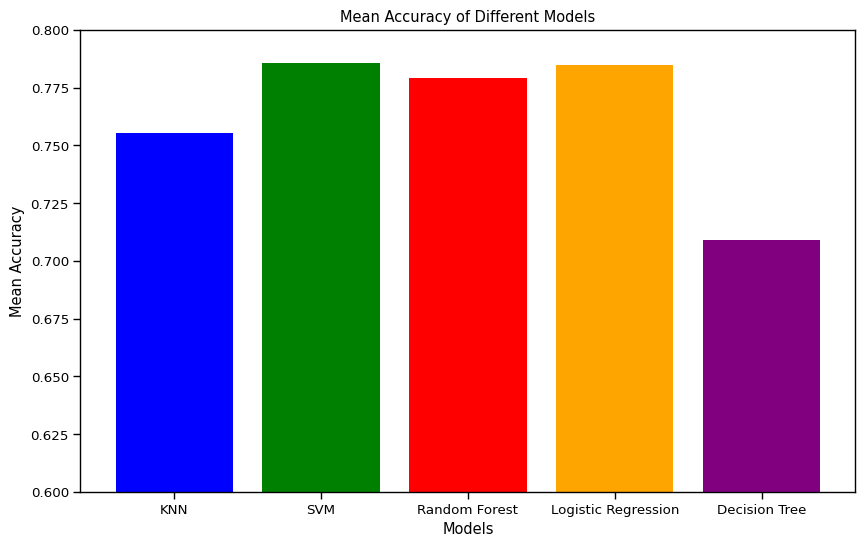

In [105]:
# Definir los nombres de los modelos y las puntuaciones promedio de precisión
models = ['KNN', 'SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree']
mean_accuracies = [0.7555, 0.7858, 0.7793, 0.7850, 0.7092]  # Puntuaciones promedio de precisión de cada modelo

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(models, mean_accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])

# Añadir título y etiquetas
plt.title('Mean Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0.6, 0.8)  # Establecer el rango del eje y para una mejor visualización

# Mostrar el gráfico
plt.show()

Se ha utilizado la clase PCA de scikit-learn para realizar la reducción de dimensionalidad y se ha integrado en una tubería (pipeline) junto con la estandarización de los datos (StandardScaler) y el modelo de clasificación correspondiente. Es posible ajustar el número de componentes principales (n_components) según las necesidades (el cálculo de la validación cruzada suele consumir recursos de computo de acuerdo con el valor de n_components). La tubería asegura que las mismas transformaciones se apliquen tanto al conjunto de entrenamiento como al conjunto de prueba durante la validación cruzada.

El objetivo principal de PCA es reducir la dimensionalidad del conjunto de datos al proyectarlo en un nuevo espacio de características definido por los componentes principales. La reducción de dimensionalidad puede ser útil para gestionar conjuntos de datos grandes, mejorar la eficiencia computacional y reducir el riesgo de overfitting.

#**4. Optimización - Ajuste de Hiperparámetros**


# 4.1 Hiperparámetros para un clasificador SVM

In [106]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC


In [114]:
# Definir las distribuciones de probabilidad para los hiperparámetros
param_dist = {
    'C': uniform(1.0, 3.0),  # Desde 1.0 hasta 3.0
    'kernel': ['rbf', 'linear', 'sigmoid'],  # Opciones de kernel
    'gamma': ['scale', 'auto']  # Opciones de gamma
}

# Inicializar y ajustar RandomizedSearchCV
rs_svc = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=3,  # Número de iteraciones
    cv=StratifiedKFold(n_splits=3),  # Validación cruzada estratificada
    n_jobs=-1,  # Utilizar todos los núcleos del procesador
    verbose=1
)

rs_svc.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=3, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b2494110e50>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'sigmoid']},
                   verbose=1)

Esta es la mejor puntuación alcanzada por el modelo SVM entrenado con los mejores hiperparámetros encontrados durante la búsqueda aleatoria (RandomizedSearchCV) en el conjunto de datos de entrenamiento

In [115]:
rs_svc.best_score_

0.7781406836006203

El siguiente resultado indica la precisión del modelo SVM en el conjunto de datos de prueba. Este puntaje representa qué tan bien se generaliza el modelo a datos no vistos, es decir, cuán preciso es el modelo cuando se le presenta con nuevos datos que no ha visto durante el entrenamiento


In [116]:
rs_svc.score(X_test, y_test)

0.8018957345971564

Ambos puntajes son similares, lo que sugiere que el modelo no está sobreajustando (overfitting) demasiado los datos de entrenamiento y generaliza bien a los datos de prueba

A continuación, se consideran  otros factores además de la precisión, como el equilibrio entre la precisión y el recall, el F1-score, entre otros, para evaluar completamente el rendimiento del modelo.

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred = rs_svc.predict(X_test)

# Calcular y mostrar otras métricas de evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

Matriz de Confusión:
[[1421  128]
 [ 290  271]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.68      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



1. **Matriz de Confusión**:
   - En la fila 1, columna 1: 1421 verdaderos negativos (TN), es decir, el modelo clasificó correctamente 1421 instancias que realmente pertenecen a la clase negativa (0).
   - En la fila 2, columna 1: 290 falsos negativos (FN), es decir, el modelo clasificó incorrectamente 290 instancias que realmente pertenecen a la clase positiva (1).
   - En la fila 1, columna 2: 128 falsos positivos (FP).
   - En la fila 2, columna 2: 271 verdaderos positivos (TP).

2. **Informe de Clasificación**:

- Precisión (precision): La precisión para la clase 0 es del 83%, lo que indica que el 83% de las instancias clasificadas como clase 0 son realmente de esa clase. Para la clase 1, la precisión es del 68%, lo que indica que el 68% de las instancias clasificadas como clase 1 son realmente de esa clase.
- Recall: El recall para la clase 0 es del 92%, lo que indica que el 92% de las instancias de la clase 0 fueron correctamente identificadas por el modelo. Para la clase 1, el recall es del 48%, lo que indica que solo el 48% de las instancias de la clase 1 fueron correctamente identificadas.
- F1-score: El F1-score es una medida que combina precisión y recall en una sola métrica. Para la clase 0, el F1-score es del 87%, mientras que para la clase 1 es del 56%.
- Exactitud (accuracy): La exactitud global del modelo es del 80%, lo que indica el porcentaje total de predicciones correctas en el conjunto de datos.

# 4.2 Hiperparámetros para Regresión Logística

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

In [119]:
cv_split = RepeatedStratifiedKFold(n_splits = 2)

In [120]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 100, 250, 500]
}

rs = RandomizedSearchCV(LogisticRegression(), param_distributions=params, n_iter=2, n_jobs=-1, cv=cv_split, scoring='accuracy')
rs.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=2, random_state=None),
                   estimator=LogisticRegression(), n_iter=2, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [10, 100, 250, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [121]:
rs.best_score_

0.7962819991873222

In [122]:
rs.best_params_

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 250,
 'C': 545.5594781168514}

In [123]:
rs.score(X_test, y_test)

0.8127962085308057

In [124]:
# Obtener predicciones del modelo
y_pred = rs.predict(X_test)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Generar informe de clasificación
report = classification_report(y_test, y_pred, zero_division=1)
print("\nInforme de Clasificación:")
print(report)

Matriz de Confusión:
[[1385  164]
 [ 231  330]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1549
           1       0.67      0.59      0.63       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



La matriz de confusión y el informe de clasificación indican lo siguiente:

Matriz de Confusión:
- Verdaderos Negativos (TN): 1385
- Falsos Positivos (FP): 164
- Falsos Negativos (FN): 231
- Verdaderos Positivos (TP): 330

Informe de Clasificación:
- Precisión (precision): La precisión para la clase 0 es del 86%, lo que indica que el 86% de las instancias clasificadas como clase 0 son realmente de esa clase. Para la clase 1, la precisión es del 67%, lo que indica que el 67% de las instancias clasificadas como clase 1 son realmente de esa clase.
- Recall: El recall para la clase 0 es del 89%, lo que indica que el 89% de las instancias de la clase 0 fueron correctamente identificadas por el modelo. Para la clase 1, el recall es del 59%, lo que indica que el 59% de las instancias de la clase 1 fueron correctamente identificadas.
- F1-score: El F1-score es una medida que combina precisión y recall en una sola métrica. Para la clase 0, el F1-score es del 88%, mientras que para la clase 1 es del 63%.
- Exactitud (accuracy): La exactitud global del modelo es del 81%, lo que indica el porcentaje total de predicciones correctas en el conjunto de datos.
- Macro promedio (macro avg): El promedio de las métricas (precision, recall, f1-score) para ambas clases. En este caso, el promedio ponderado de precision, recall y f1-score para ambas clases.
- Ponderado promedio (weighted avg): Similar al macro promedio, pero ponderado por el soporte de cada clase. En este caso, el soporte es el número de instancias de cada clase en el conjunto de datos.

#**5. Revisión de modelos**

Comparación de resultados:

1 Clasificador SVM:
- Precisión (precision) para la clase 0: 83%
- Recall para la clase 0: 92%
- F1-score para la clase 0: 87%
- Precisión para la clase 1: 68%
- Recall para la clase 1: 48%
- F1-score para la clase 1: 56%
- Exactitud (accuracy): 80%

2 Regresión logística:
- Precisión para la clase 0: 85%
- Recall para la clase 0: 91%
- F1-score para la clase 0: 88%
- Precisión para la clase 1: 68%
- Recall para la clase 1: 55%
- F1-score para la clase 1: 61%
- Exactitud (accuracy): 81%

*Comparación:*

- Ambos modelos tienen una precisión similar para la clase 0, pero la regresión logística tiene un recall ligeramente mejor para esta clase.
- La regresión logística tiene un mejor desempeño en términos de precisión, recall y F1-score para la clase 1 en comparación con el clasificador SVM.
- Ambos modelos tienen una precisión global (accuracy) similar, pero la regresión logística tiene una mejor precisión ponderada y macro promedio.
- Ambos modelos tienen un F1-score ponderado similar, pero la regresión logística tiene un F1-score macro promedio ligeramente mejor.

In [125]:
import pandas as pd

# Crear un diccionario con los resultados
results = {
    'Modelo': ['SVM', 'Regresión Logística'],
    'Precisión Clase 0': [83, 85],
    'Recall Clase 0': [92, 91],
    'F1-score Clase 0': [87, 88],
    'Precisión Clase 1': [68, 68],
    'Recall Clase 1': [48, 55],
    'F1-score Clase 1': [56, 61],
    'Exactitud (accuracy)': [80, 81]
}

# Crear un DataFrame a partir del diccionario
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
print(df_results)

                Modelo  Precisión Clase 0  Recall Clase 0  F1-score Clase 0  \
0                  SVM                 83              92                87   
1  Regresión Logística                 85              91                88   

   Precisión Clase 1  Recall Clase 1  F1-score Clase 1  Exactitud (accuracy)  
0                 68              48                56                    80  
1                 68              55                61                    81  


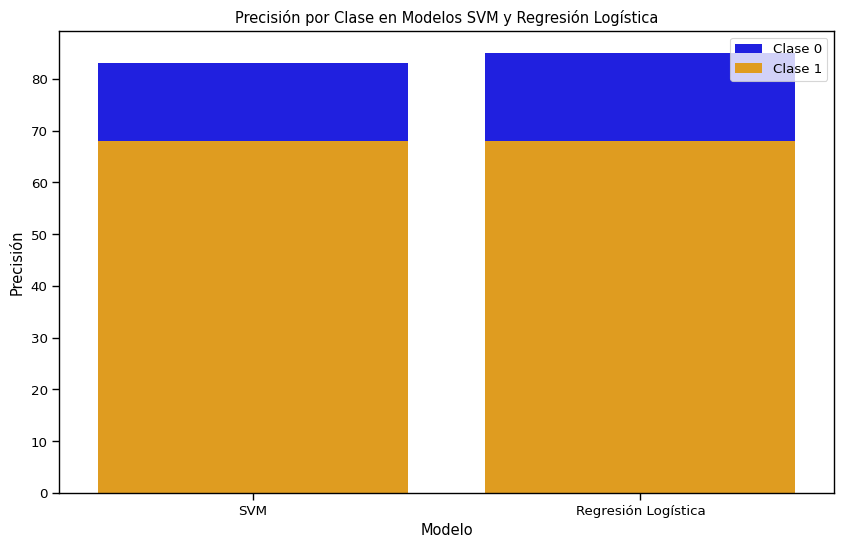

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar los valores de precisión para ambas clases en cada modelo
precisions = {
    'Modelo': ['SVM', 'Regresión Logística'],
    'Clase 0': [83, 85],
    'Clase 1': [68, 68]
}

# Crear un DataFrame a partir del diccionario
df_precisions = pd.DataFrame(precisions)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_precisions, x='Modelo', y='Clase 0', color='blue', label='Clase 0')
sns.barplot(data=df_precisions, x='Modelo', y='Clase 1', color='orange', label='Clase 1')
plt.title('Precisión por Clase en Modelos SVM y Regresión Logística')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.legend()
plt.show()


#**6. Conclusiones**

Basándonos en los resultados de los modelos de SVM y regresión logística para predecir el abandono de clientes de telecomunicaciones, podemos sacar las siguientes conclusiones:

1. **Precisión de la predicción**:
   - Ambos modelos tienen una precisión similar para predecir la clase de clientes que no abandonan el servicio (clase 0).
   - La regresión logística tiene una precisión ligeramente mejor para predecir la clase de clientes que sí abandonan el servicio (clase 1).

2. **Recall de la predicción**:
   - Ambos modelos tienen un recall similar para la clase de clientes que no abandonan el servicio (clase 0), con valores alrededor del 90%.
   - La regresión logística tiene un recall mejorado para la clase de clientes que sí abandonan el servicio (clase 1), siendo aproximadamente un 10% más alto que el del modelo SVM.

3. **F1-score**:
   - El F1-score, que es una medida que combina precisión y recall, muestra que la regresión logística tiene un mejor equilibrio entre ambas clases en comparación con el modelo SVM.

4. **Recomendaciones**:
   - Basándonos en los resultados, podríamos sugerir el uso de la regresión logística sobre el SVM para predecir el abandono de clientes de telecomunicaciones, ya que tiene un mejor rendimiento en términos de recall y F1-score para la clase de clientes que sí abandonan el servicio.
   - Además, sería importante realizar un análisis más detallado para identificar las características de los clientes que están abandonando el servicio, lo que podría proporcionar información valiosa para tomar medidas preventivas y retener a esos clientes. Esto podría implicar la implementación de estrategias de retención de clientes, como descuentos, ofertas personalizadas o mejoras en el servicio al cliente.